In [1]:
#Mounting a Google Drive
!pip install kora -q
from kora import drive
drive.mount("/content/drive/")
drive.link_nbs()

     |████████████████████████████████| 57 kB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 55.1 MB/s 
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import math

## GPU - NVIDIA GeForce RTX 2080 Ti



###GPU Characteristics Analysis (5-min)

In [3]:
import pandas as pd

#Specifying file path
base_file_path = "drive/MyDrive/DeepMD_MTP_Project/Code/"

In [ ]:
#Data Loading

#Reading data using pandas
df = pd.read_csv(base_file_path + 'GPU_Characteristics_Analysis_data/single_gpu_log.csv')

#Adding columns as it is not present in file
df.columns = ['timestamp','index','name','pci.bus_id','driver_version','pstate','temperature.gpu','utilization.gpu[%]','utilization.memory[%]','memory.total',
              'memory.free','memory.used[MiB]','fan.speed[%]','power.draw[W]','clocks.current.sm','clocks.current.memory','clocks.current.graphics',
              'pcie.link.gen.max','pcie.link.gen.current']

#Selecting Only GPU 0 data
df = df[df['index']==0]

In [ ]:
df.head(10)

timestamp  index                         name  \
1   2022/08/30 15:00:01.000      0   NVIDIA GeForce RTX 2080 Ti   
3   2022/08/30 15:05:01.000      0   NVIDIA GeForce RTX 2080 Ti   
5   2022/08/30 15:10:01.000      0   NVIDIA GeForce RTX 2080 Ti   
7   2022/08/30 15:15:01.000      0   NVIDIA GeForce RTX 2080 Ti   
9   2022/08/30 15:20:01.000      0   NVIDIA GeForce RTX 2080 Ti   
11  2022/08/30 15:25:01.000      0   NVIDIA GeForce RTX 2080 Ti   
13  2022/08/30 15:30:01.000      0   NVIDIA GeForce RTX 2080 Ti   
15  2022/08/30 15:35:01.000      0   NVIDIA GeForce RTX 2080 Ti   
17  2022/08/30 15:40:01.000      0   NVIDIA GeForce RTX 2080 Ti   
19  2022/08/30 15:45:01.000      0   NVIDIA GeForce RTX 2080 Ti   

           pci.bus_id driver_version pstate  temperature.gpu  \
1    00000000:15:00.0      515.43.04     P2               83   
3    00000000:15:00.0      515.43.04     P2               84   
5    00000000:15:00.0      515.43.04     P2               84   
7    00000000:15:00.0      515.43.04     P2               83   
9    00000000:15:00.0      515.43.04     P2               85   
11   00000000:15:00.0      515.43.04     P2               84   
13   00000000:15:00.0      515.43.04     P2               84   
15   00000000:15:00.0      515.43.04     P2               85   
17   00000000:15:00.0      515.43.04     P2               83   
19   00000000:15:00.0      515.43.04     P2               84   

   utilization.gpu[%] utilization.memory[%] memory.total memory.free  \
1                77 %                  15 %    11264 MiB    9775 MiB   
3                80 %                  15 %    11264 MiB    9775 MiB   
5                79 %                  15 %    11264 MiB    9775 MiB   
7                79 %                  15 %    11264 MiB    9775 MiB   
9                77 %                  14 %    11264 MiB    9775 MiB   
11               74 %                  14 %    11264 MiB    9775 MiB   
13               79 %                  15 %    11264 MiB    9775 MiB   
15               84 %                  16 %    11264 MiB    9926 MiB   
17               84 %                  15 %    11264 MiB    9926 MiB   
19               80 %                  15 %    11264 MiB    9926 MiB   

   memory.used[MiB] fan.speed[%] power.draw[W] clocks.current.sm  \
1          1243 MiB         47 %      150.39 W          1770 MHz   
3          1243 MiB         48 %      162.29 W          1755 MHz   
5          1243 MiB         49 %      157.62 W          1710 MHz   
7          1243 MiB         49 %      128.80 W          1590 MHz   
9          1243 MiB         49 %      176.76 W          1770 MHz   
11         1243 MiB         49 %      138.62 W          1620 MHz   
13         1243 MiB         49 %      142.62 W          1635 MHz   
15         1092 MiB         49 %      170.05 W          1725 MHz   
17         1092 MiB         49 %      130.33 W          1545 MHz   
19         1092 MiB         49 %      149.61 W          1665 MHz   

   clocks.current.memory clocks.current.graphics  pcie.link.gen.max  \
1               6800 MHz                1770 MHz                  3   
3               6800 MHz                1755 MHz                  3   
5               6800 MHz                1710 MHz                  3   
7               6800 MHz                1590 MHz                  3   
9               6800 MHz                1770 MHz                  3   
11              6800 MHz                1590 MHz                  3   
13              6800 MHz                1635 MHz                  3   
15              6800 MHz                1725 MHz                  3   
17              6800 MHz                1545 MHz                  3   
19              6800 MHz                1665 MHz                  3   

    pcie.link.gen.current  
1                       3  
3                       3  
5                       3  
7                       3  
9                       3  
11                      3  
13                      3  
15                      3  

In [ ]:
def remove_percent(string):
    return int(string.strip('%'))

def remove_MiB_unit(string):
    return int(string.strip('MiB'))

def remove_W_unit(string):
    return float(string.strip('W'))

In [ ]:
df['utilization.gpu[%]'] = df['utilization.gpu[%]'].apply(remove_percent)
df['utilization.memory[%]'] = df['utilization.memory[%]'].apply(remove_percent)
df['memory.used[MiB]'] = df['memory.used[MiB]'].apply(remove_MiB_unit)
df['power.draw[W]'] = df['power.draw[W]'].apply(remove_W_unit)
df['fan.speed[%]'] = df['fan.speed[%]'].apply(remove_percent)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%H:%M:%S')

In [ ]:
#Filtering out data
df = df[df['utilization.gpu[%]'] > 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 33
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                17 non-null     object 
 1   index                    17 non-null     int64  
 2   name                     17 non-null     object 
 3   pci.bus_id               17 non-null     object 
 4   driver_version           17 non-null     object 
 5   pstate                   17 non-null     object 
 6   temperature.gpu          17 non-null     int64  
 7   utilization.gpu[%]       17 non-null     int64  
 8   utilization.memory[%]    17 non-null     int64  
 9   memory.total             17 non-null     object 
 10  memory.free              17 non-null     object 
 11  memory.used[MiB]         17 non-null     int64  
 12  fan.speed[%]             17 non-null     int64  
 13  power.draw[W]            17 non-null     float64
 14  clocks.current.sm        17 

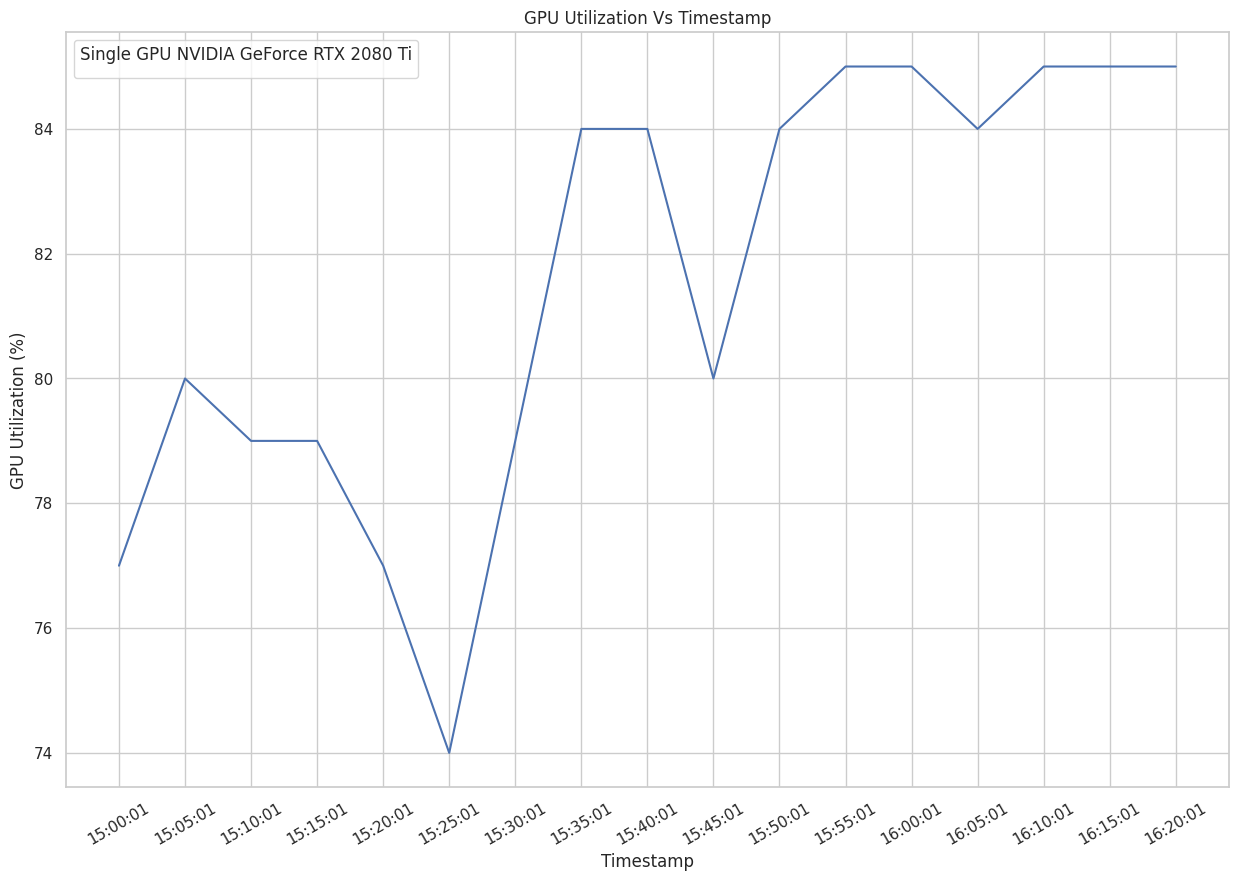

In [ ]:
#Graph of GPU Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.gpu[%]',data=df,palette="viridis")
ax.set(xlabel='Timestamp', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_5_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Timestamp')
plt.show()

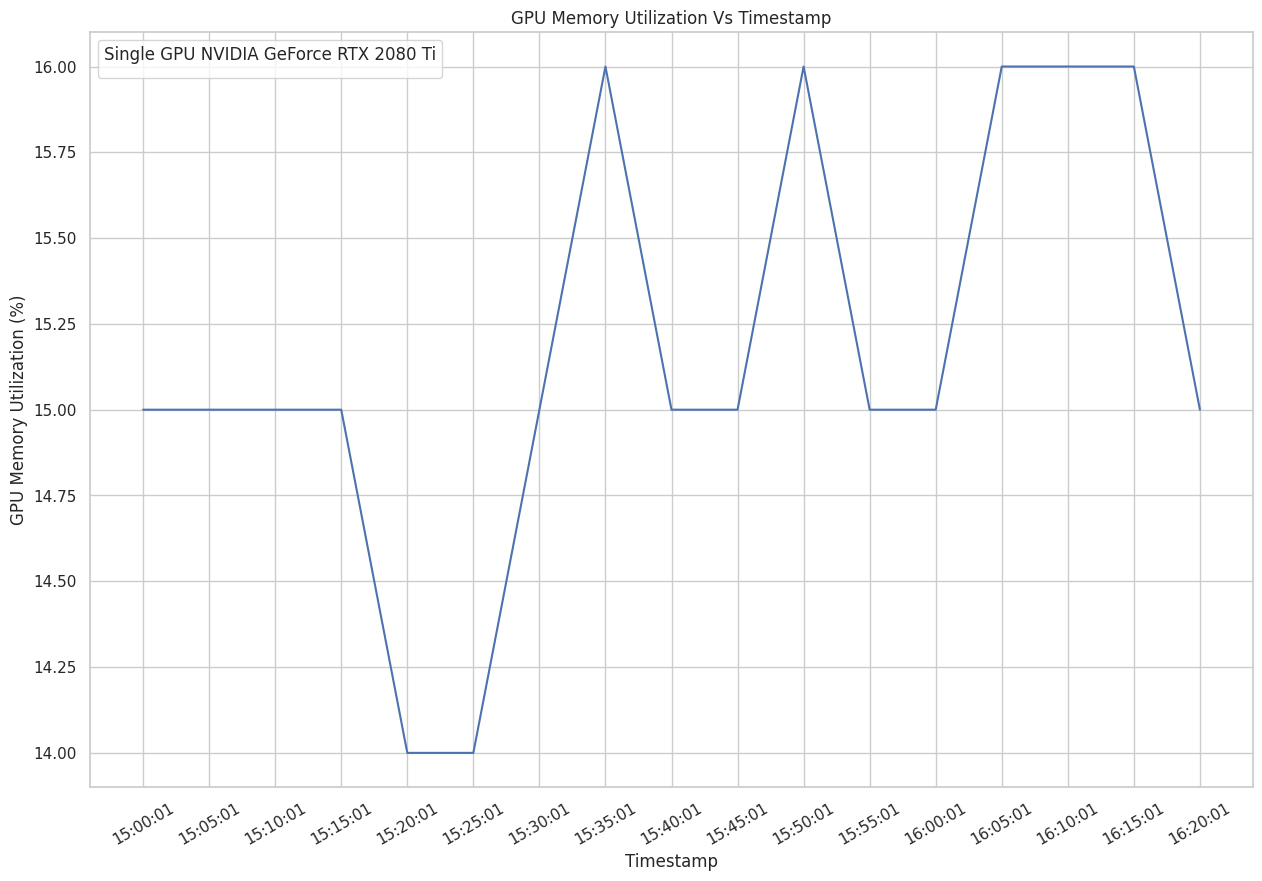

In [ ]:
#Graph of GPU Memory Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.memory[%]',data=df,palette="viridis")
ax.set(xlabel='Timestamp', ylabel='GPU Memory Utilization (%)')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Memory_Utilization_5_Min.svg',bbox_inches = 'tight')
plt.title('GPU Memory Utilization Vs Timestamp')
plt.show()

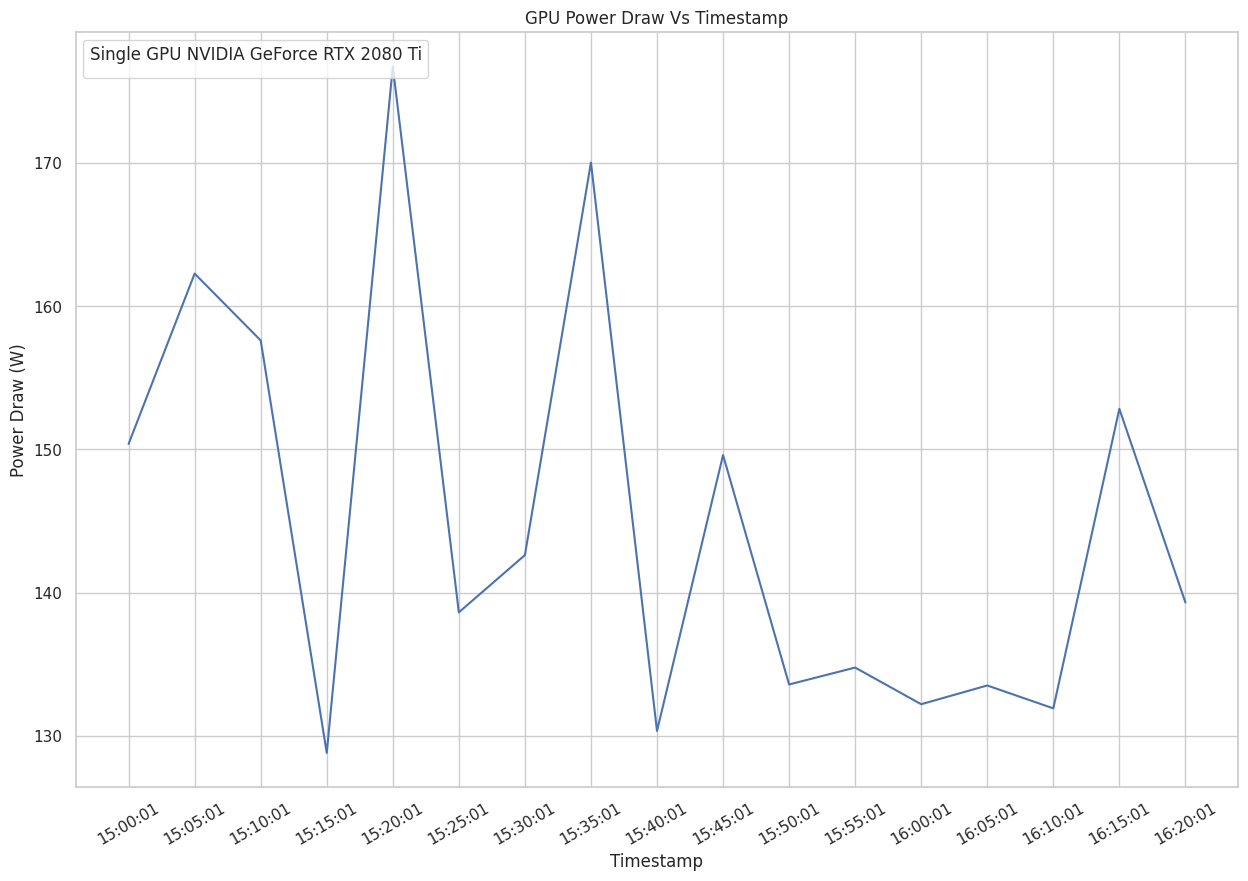

In [ ]:
#Graph of GPU Power Draw Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='power.draw[W]',data=df,palette="viridis")
ax.set(xlabel='Timestamp', ylabel='Power Draw (W)')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Power_Draw_5_Min.svg',bbox_inches = 'tight')
plt.title('GPU Power Draw Vs Timestamp')
plt.show()

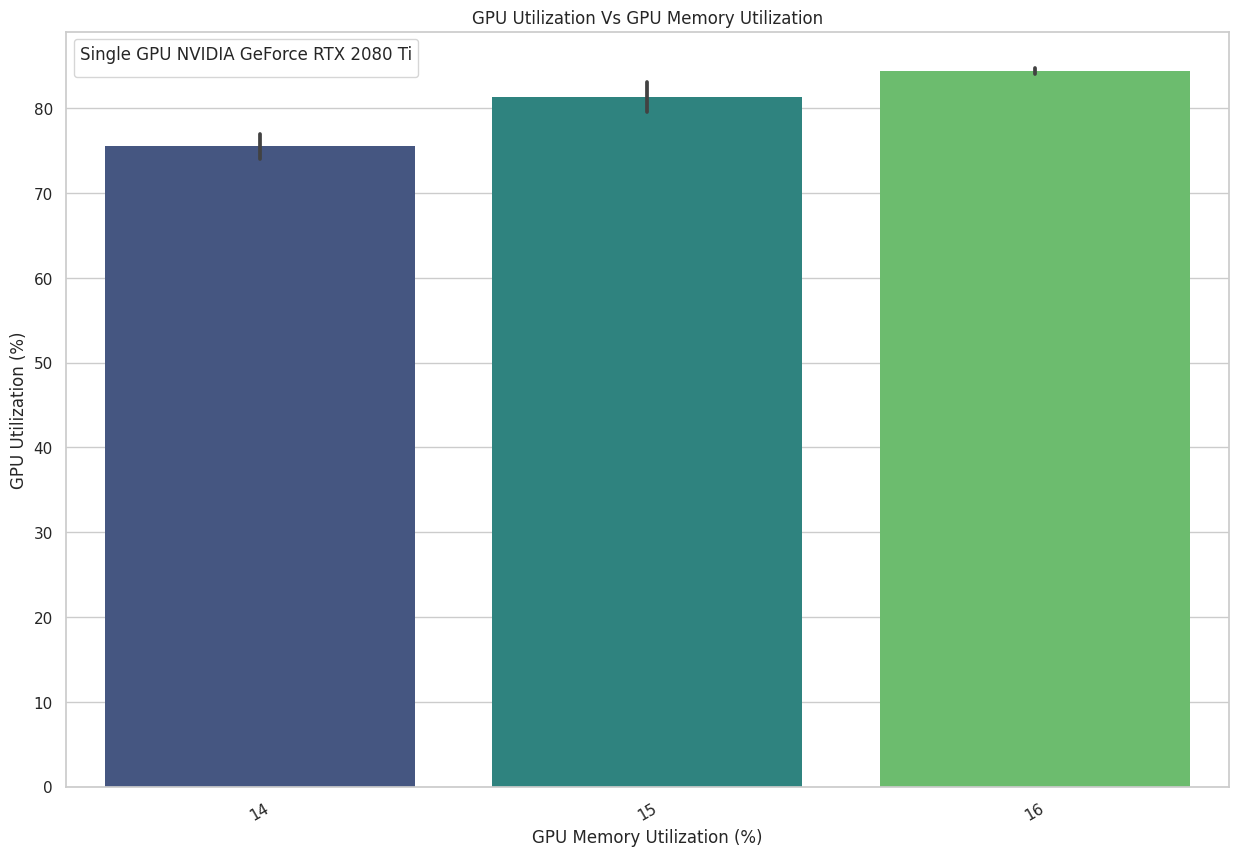

In [ ]:
#Graph of GPU Utilization Vs GPU Memory Utilization
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='utilization.memory[%]',y='utilization.gpu[%]',data=df,palette="viridis")
ax.set(xlabel='GPU Memory Utilization (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_Comp_Memory_5_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs GPU Memory Utilization')
plt.show()

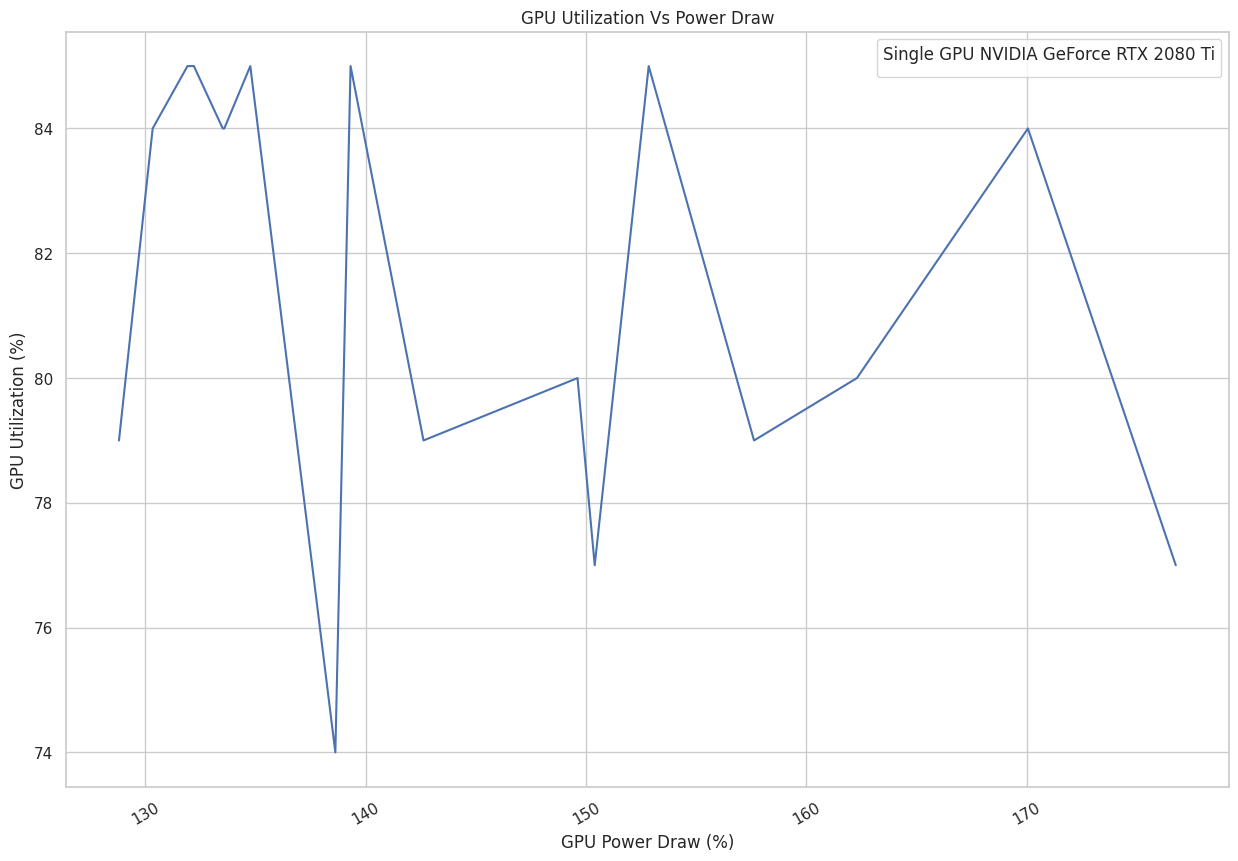

In [ ]:
#Graph of GPU Utilization Vs Power Draw
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='power.draw[W]',y='utilization.gpu[%]',data=df,palette="viridis")
ax.set(xlabel='GPU Power Draw (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper right')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_Comp_Power_5_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Power Draw')
plt.show()

###GPU Characteristics Analysis (2-min)

In [ ]:
#Data Loading

import pandas as pd
#Specifying file path
base_file_path = "drive/MyDrive/DeepMD_MTP_Project/Code/"

#Reading data using pandas
df = pd.read_csv(base_file_path + 'GPU_Characteristics_Analysis_data/gpu_log_ice_triple_I.csv')

#Adding columns as it is not present in file
df.columns = ['timestamp','index','name','pci.bus_id','driver_version','pstate','temperature.gpu','utilization.gpu[%]','utilization.memory[%]','memory.total',
              'memory.free','memory.used[MiB]','fan.speed[%]','power.draw[W]','clocks.current.sm','clocks.current.memory','clocks.current.graphics',
              'pcie.link.gen.max','pcie.link.gen.current']

#Selecting Only GPU 0 data
df = df[df['index']==0]

In [ ]:
df.head(10)

timestamp  index                         name  \
1   2022/09/01 04:30:01.000      0   NVIDIA GeForce RTX 2080 Ti   
3   2022/09/01 04:32:01.000      0   NVIDIA GeForce RTX 2080 Ti   
5   2022/09/01 04:34:01.000      0   NVIDIA GeForce RTX 2080 Ti   
7   2022/09/01 04:36:01.000      0   NVIDIA GeForce RTX 2080 Ti   
9   2022/09/01 04:38:01.000      0   NVIDIA GeForce RTX 2080 Ti   
11  2022/09/01 04:40:01.000      0   NVIDIA GeForce RTX 2080 Ti   
13  2022/09/01 04:42:01.000      0   NVIDIA GeForce RTX 2080 Ti   
15  2022/09/01 04:44:01.000      0   NVIDIA GeForce RTX 2080 Ti   
17  2022/09/01 04:46:01.000      0   NVIDIA GeForce RTX 2080 Ti   
19  2022/09/01 04:48:01.000      0   NVIDIA GeForce RTX 2080 Ti   

           pci.bus_id driver_version pstate  temperature.gpu  \
1    00000000:15:00.0      515.43.04     P2               83   
3    00000000:15:00.0      515.43.04     P2               84   
5    00000000:15:00.0      515.43.04     P2               84   
7    00000000:15:00.0      515.43.04     P2               84   
9    00000000:15:00.0      515.43.04     P2               84   
11   00000000:15:00.0      515.43.04     P2               84   
13   00000000:15:00.0      515.43.04     P2               84   
15   00000000:15:00.0      515.43.04     P2               84   
17   00000000:15:00.0      515.43.04     P2               84   
19   00000000:15:00.0      515.43.04     P2               84   

   utilization.gpu[%] utilization.memory[%] memory.total memory.free  \
1                84 %                  16 %    11264 MiB    9775 MiB   
3                84 %                  16 %    11264 MiB    9775 MiB   
5                84 %                  16 %    11264 MiB    9775 MiB   
7                84 %                  16 %    11264 MiB    9775 MiB   
9                83 %                  16 %    11264 MiB    9775 MiB   
11               85 %                  16 %    11264 MiB    9775 MiB   
13               84 %                  15 %    11264 MiB    9775 MiB   
15               85 %                  15 %    11264 MiB    9775 MiB   
17               85 %                  16 %    11264 MiB    9775 MiB   
19               81 %                  15 %    11264 MiB    9775 MiB   

   memory.used[MiB] fan.speed[%] power.draw[W] clocks.current.sm  \
1          1243 MiB         46 %      178.35 W          1770 MHz   
3          1243 MiB         47 %      164.17 W          1770 MHz   
5          1243 MiB         48 %      150.31 W          1665 MHz   
7          1243 MiB         48 %      139.99 W          1770 MHz   
9          1243 MiB         49 %      147.76 W          1635 MHz   
11         1243 MiB         49 %      156.09 W          1695 MHz   
13         1243 MiB         49 %      156.02 W          1665 MHz   
15         1243 MiB         49 %      154.76 W          1605 MHz   
17         1243 MiB         49 %      132.40 W          1545 MHz   
19         1243 MiB         49 %      150.77 W          1650 MHz   

   clocks.current.memory clocks.current.graphics  pcie.link.gen.max  \
1               6800 MHz                1770 MHz                  3   
3               6800 MHz                1770 MHz                  3   
5               6800 MHz                1665 MHz                  3   
7               6800 MHz                1770 MHz                  3   
9               6800 MHz                1635 MHz                  3   
11              6800 MHz                1695 MHz                  3   
13              6800 MHz                1665 MHz                  3   
15              6800 MHz                1605 MHz                  3   
17              6800 MHz                1545 MHz                  3   
19              6800 MHz                1650 MHz                  3   

    pcie.link.gen.current  
1                       3  
3                       3  
5                       3  
7                       3  
9                       3  
11                      3  
13                      3  
15                      3  

In [ ]:
df['utilization.gpu[%]'] = df['utilization.gpu[%]'].apply(remove_percent)
df['utilization.memory[%]'] = df['utilization.memory[%]'].apply(remove_percent)
df['memory.used[MiB]'] = df['memory.used[MiB]'].apply(remove_MiB_unit)
df['power.draw[W]'] = df['power.draw[W]'].apply(remove_W_unit)
df['fan.speed[%]'] = df['fan.speed[%]'].apply(remove_percent)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%H:%M:%S')

In [ ]:
#Filtering out data
df = df[df['utilization.gpu[%]'] > 0]

In [ ]:
len(df)

41

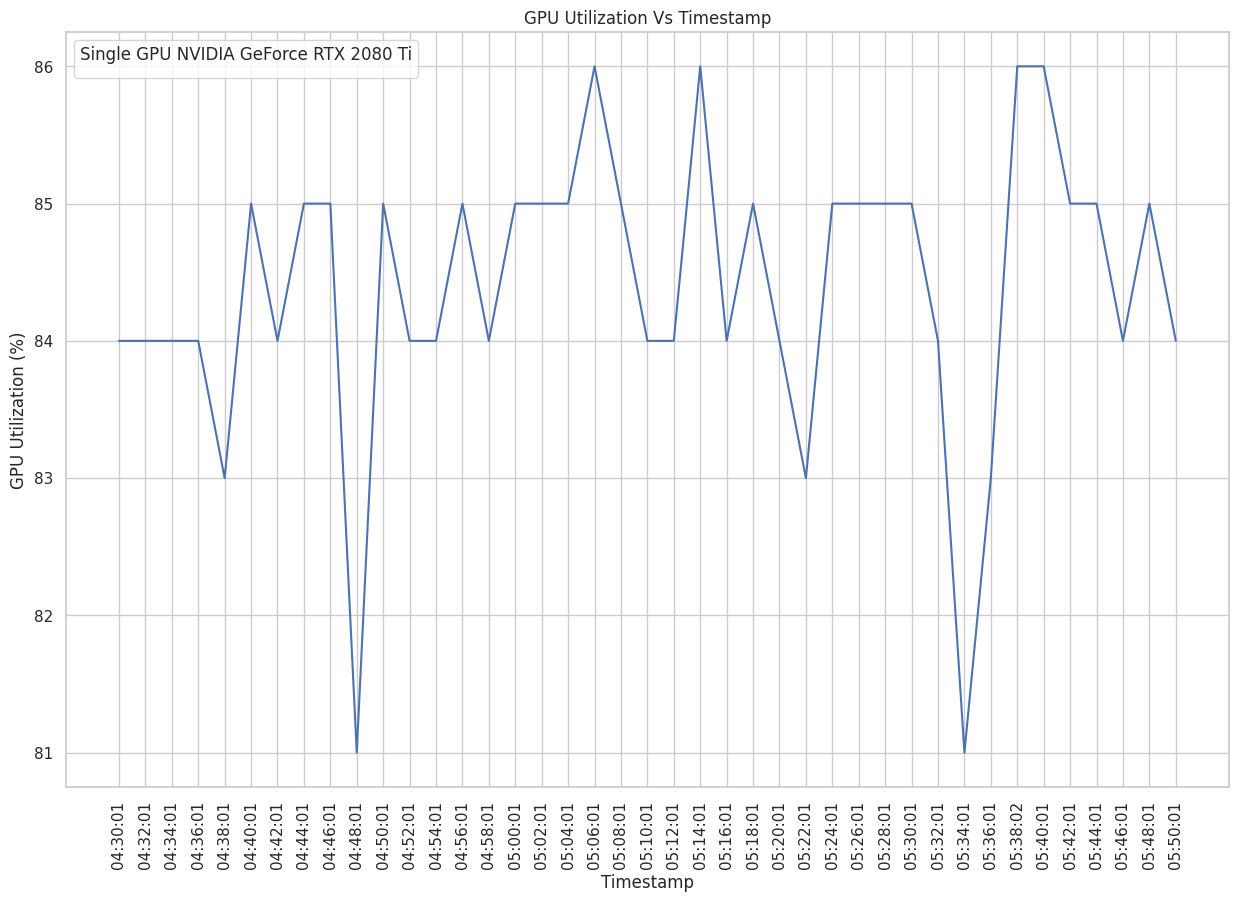

In [ ]:
#Graph of GPU Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.gpu[%]',data=df,palette="viridis")
ax.set(xlabel='Timestamp', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_2_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Timestamp')
plt.show()

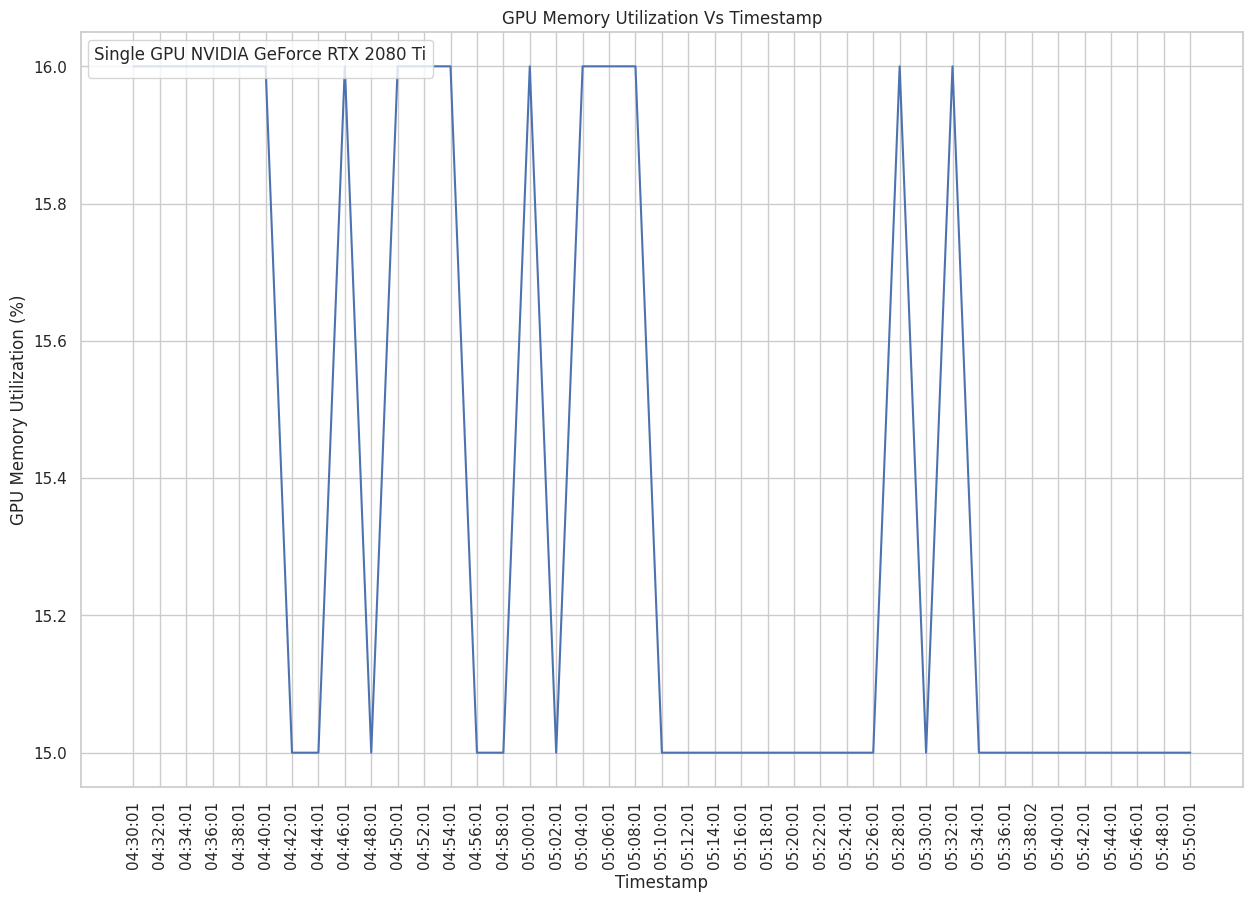

In [ ]:
#Graph of GPU Memory Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.memory[%]',data=df,palette="viridis")
ax.set(xlabel='Timestamp', ylabel='GPU Memory Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Memory_Utilization_2_Min.svg',bbox_inches = 'tight')
plt.title('GPU Memory Utilization Vs Timestamp')
plt.show()

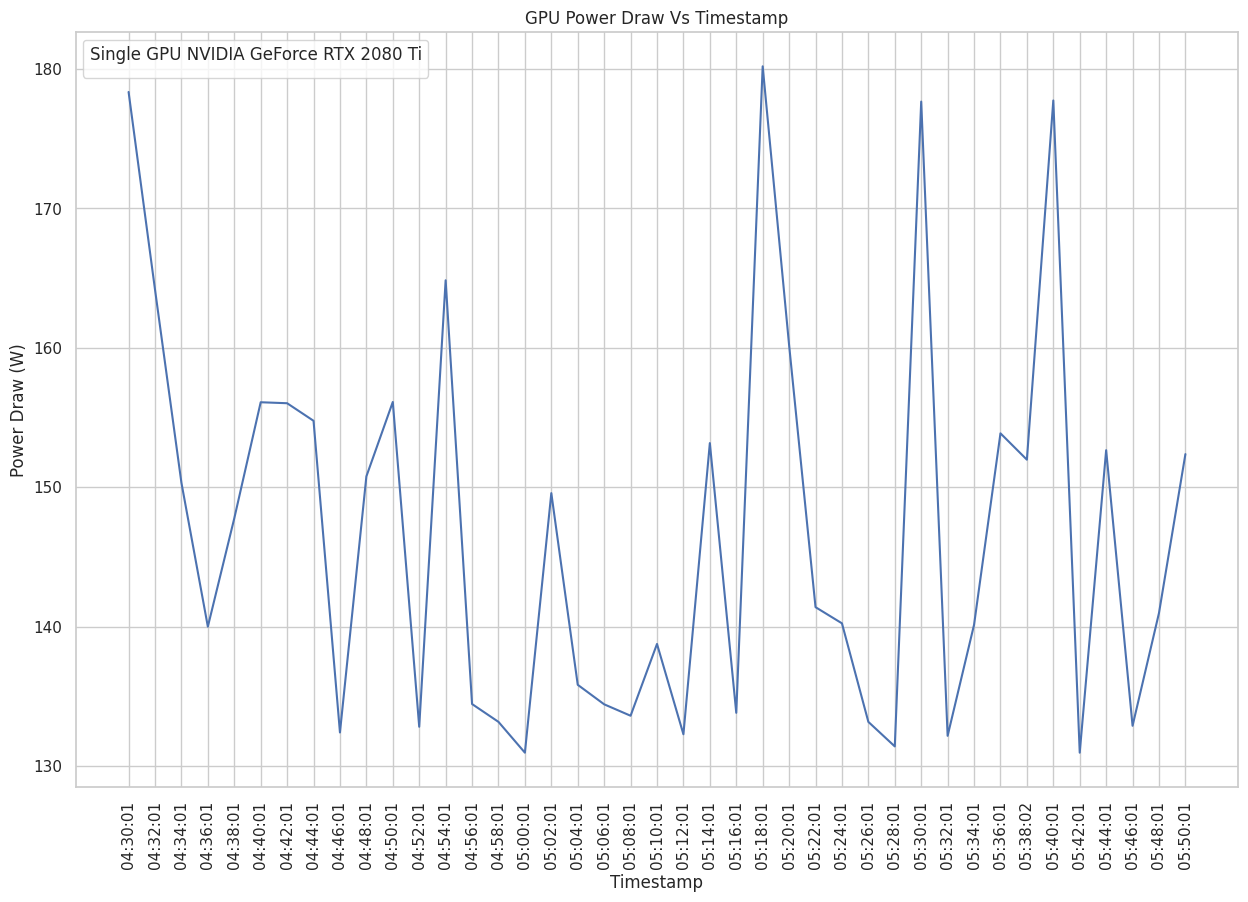

In [ ]:
#Graph of GPU Power Draw Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='power.draw[W]',data=df,palette="viridis")
ax.set(xlabel='Timestamp', ylabel='Power Draw (W)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Power_Draw_2_min.svg',bbox_inches = 'tight')
plt.title('GPU Power Draw Vs Timestamp')
plt.show()

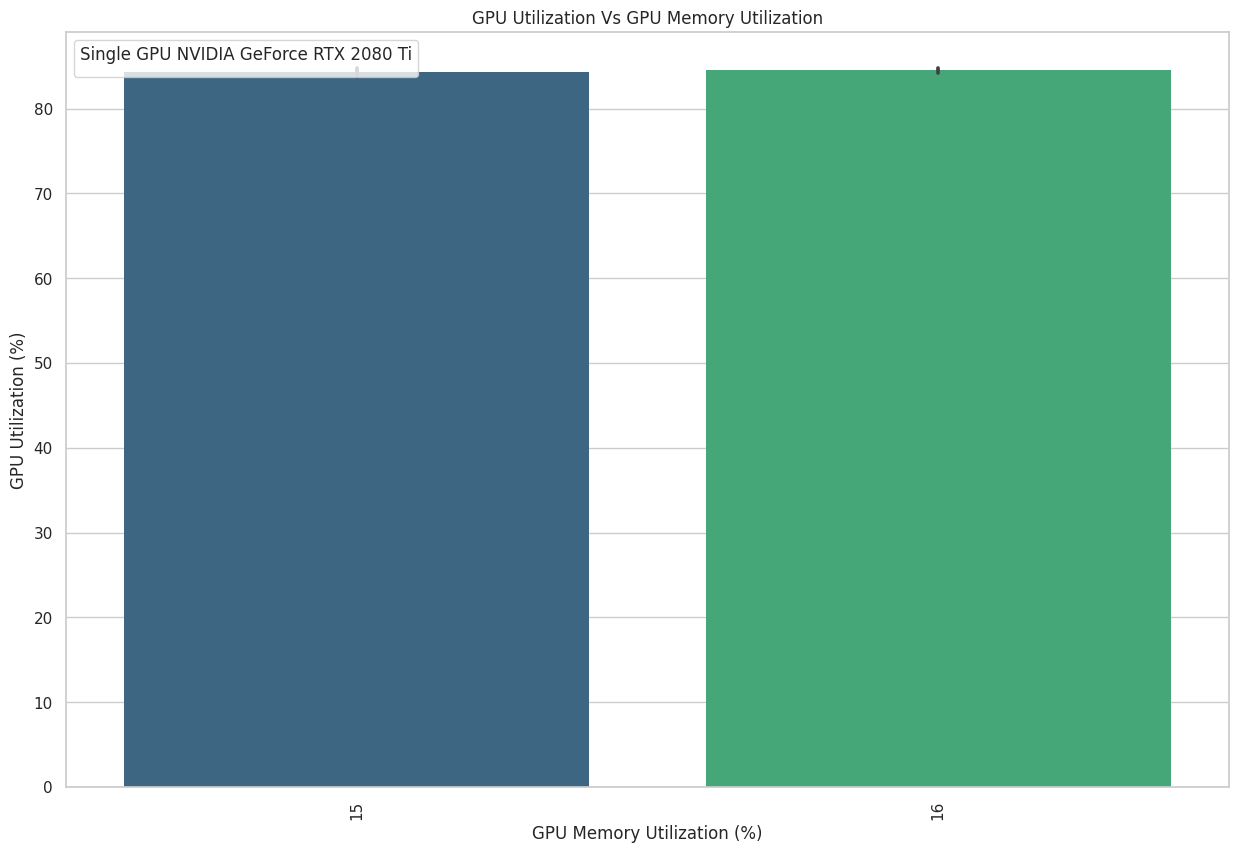

In [ ]:
#Graph of GPU Utilization Vs GPU Memory Utilization
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='utilization.memory[%]',y='utilization.gpu[%]',data=df,palette="viridis")
ax.set(xlabel='GPU Memory Utilization (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_Comp_Memory_2_min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs GPU Memory Utilization')
plt.show()

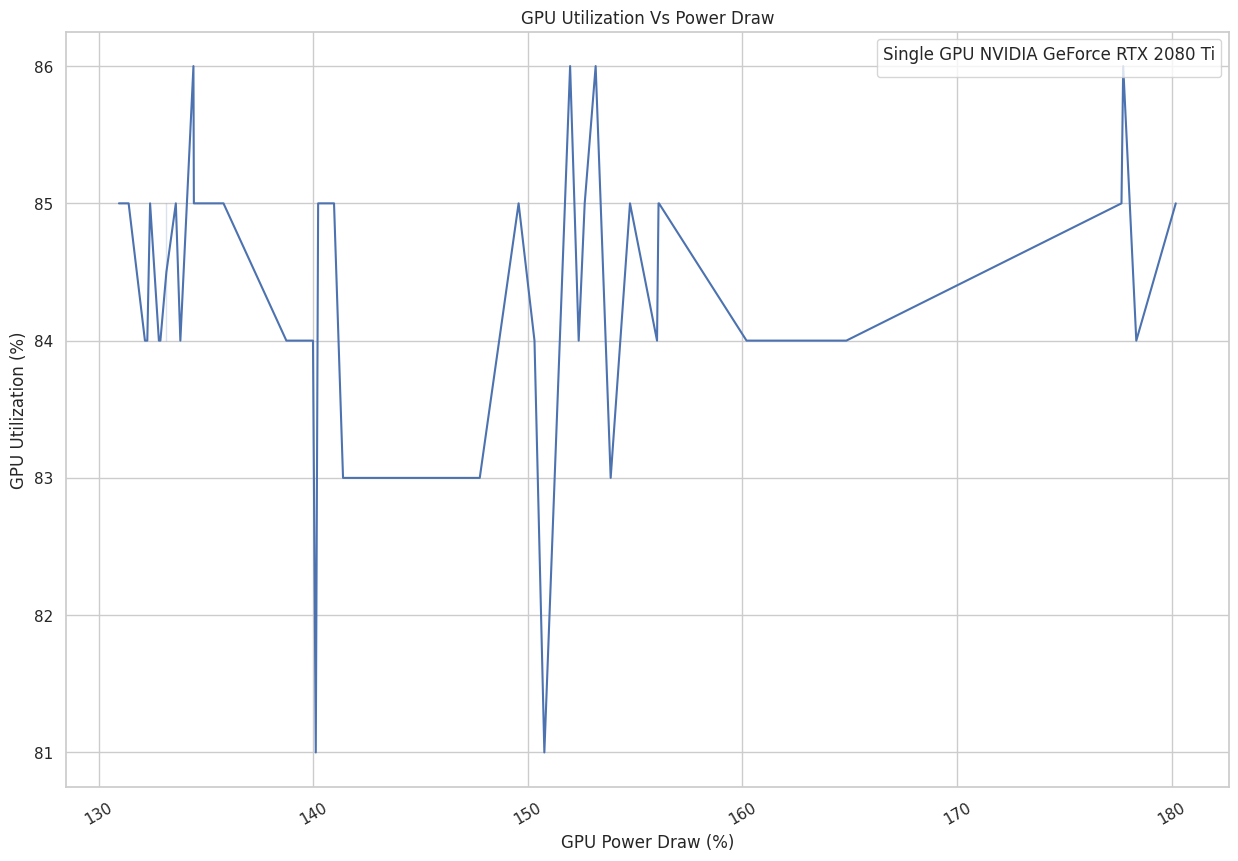

In [ ]:
#Graph of GPU Utilization Vs Power Draw
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='power.draw[W]',y='utilization.gpu[%]',data=df,palette="viridis")
ax.set(xlabel='GPU Power Draw (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper right')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_Comp_Power_2_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Power Draw')
plt.show()

###GPU Characteristics Analysis (10-min)

In [ ]:
#Data Loading

import pandas as pd
#Specifying file path
base_file_path = "drive/MyDrive/DeepMD_MTP_Project/Code/"

#Reading data using pandas
df = pd.read_csv(base_file_path + 'GPU_Characteristics_Analysis_data/gpu_log_ice_triple_II.csv')

#Adding columns as it is not present in file
df.columns = ['timestamp','index','name','pci.bus_id','driver_version','pstate','temperature.gpu','utilization.gpu[%]','utilization.memory[%]','memory.total',
              'memory.free','memory.used[MiB]','fan.speed[%]','power.draw[W]','clocks.current.sm','clocks.current.memory','clocks.current.graphics',
              'pcie.link.gen.max','pcie.link.gen.current']

#Selecting Only GPU 0 data
df = df[df['index']==0]

In [ ]:
df.head(10)

timestamp  index                         name  \
1   2022/09/01 08:20:01.000      0   NVIDIA GeForce RTX 2080 Ti   
3   2022/09/01 08:30:01.000      0   NVIDIA GeForce RTX 2080 Ti   
5   2022/09/01 08:40:01.000      0   NVIDIA GeForce RTX 2080 Ti   
7   2022/09/01 08:50:01.000      0   NVIDIA GeForce RTX 2080 Ti   
9   2022/09/01 09:00:01.000      0   NVIDIA GeForce RTX 2080 Ti   
11  2022/09/01 09:10:01.000      0   NVIDIA GeForce RTX 2080 Ti   
13  2022/09/01 09:20:01.000      0   NVIDIA GeForce RTX 2080 Ti   
15  2022/09/01 09:30:01.000      0   NVIDIA GeForce RTX 2080 Ti   
17  2022/09/01 09:40:01.000      0   NVIDIA GeForce RTX 2080 Ti   
19  2022/09/01 09:50:01.000      0   NVIDIA GeForce RTX 2080 Ti   

           pci.bus_id driver_version pstate  temperature.gpu  \
1    00000000:15:00.0      515.43.04     P2               84   
3    00000000:15:00.0      515.43.04     P2               84   
5    00000000:15:00.0      515.43.04     P2               84   
7    00000000:15:00.0      515.43.04     P2               85   
9    00000000:15:00.0      515.43.04     P2               84   
11   00000000:15:00.0      515.43.04     P2               84   
13   00000000:15:00.0      515.43.04     P2               84   
15   00000000:15:00.0      515.43.04     P2               85   
17   00000000:15:00.0      515.43.04     P8               45   
19   00000000:15:00.0      515.43.04     P8               38   

   utilization.gpu[%] utilization.memory[%] memory.total memory.free  \
1                70 %                  13 %    11264 MiB    9775 MiB   
3                84 %                  15 %    11264 MiB    9775 MiB   
5                85 %                  15 %    11264 MiB    9775 MiB   
7                85 %                  16 %    11264 MiB    9775 MiB   
9                86 %                  16 %    11264 MiB    9775 MiB   
11               86 %                  15 %    11264 MiB    9775 MiB   
13               85 %                  15 %    11264 MiB    9775 MiB   
15               84 %                  15 %    11264 MiB    9775 MiB   
17                0 %                   0 %    11264 MiB   10854 MiB   
19                0 %                   0 %    11264 MiB   10854 MiB   

   memory.used[MiB] fan.speed[%] power.draw[W] clocks.current.sm  \
1          1243 MiB         49 %      165.53 W          1620 MHz   
3          1243 MiB         49 %      165.52 W          1635 MHz   
5          1243 MiB         49 %      144.29 W          1620 MHz   
7          1243 MiB         49 %      171.63 W          1740 MHz   
9          1243 MiB         49 %      135.49 W          1545 MHz   
11         1243 MiB         49 %      135.46 W          1545 MHz   
13         1243 MiB         49 %      135.05 W          1545 MHz   
15         1243 MiB         49 %      180.64 W          1710 MHz   
17          164 MiB         30 %       19.62 W           300 MHz   
19          164 MiB         30 %       19.78 W           300 MHz   

   clocks.current.memory clocks.current.graphics  pcie.link.gen.max  \
1               6800 MHz                1620 MHz                  3   
3               6800 MHz                1635 MHz                  3   
5               6800 MHz                1620 MHz                  3   
7               6800 MHz                1740 MHz                  3   
9               6800 MHz                1545 MHz                  3   
11              6800 MHz                1545 MHz                  3   
13              6800 MHz                1545 MHz                  3   
15              6800 MHz                1710 MHz                  3   
17               405 MHz                 300 MHz                  3   
19               405 MHz                 300 MHz                  3   

    pcie.link.gen.current  
1                       3  
3                       3  
5                       3  
7                       3  
9                       3  
11                      3  
13                      3  
15                      3  

In [ ]:
df['utilization.gpu[%]'] = df['utilization.gpu[%]'].apply(remove_percent)
df['utilization.memory[%]'] = df['utilization.memory[%]'].apply(remove_percent)
df['memory.used[MiB]'] = df['memory.used[MiB]'].apply(remove_MiB_unit)
df['power.draw[W]'] = df['power.draw[W]'].apply(remove_W_unit)
df['fan.speed[%]'] = df['fan.speed[%]'].apply(remove_percent)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%H:%M:%S')

In [ ]:
#Filtering out data
df = df[df['utilization.gpu[%]'] > 0]

In [ ]:
len(df)

8

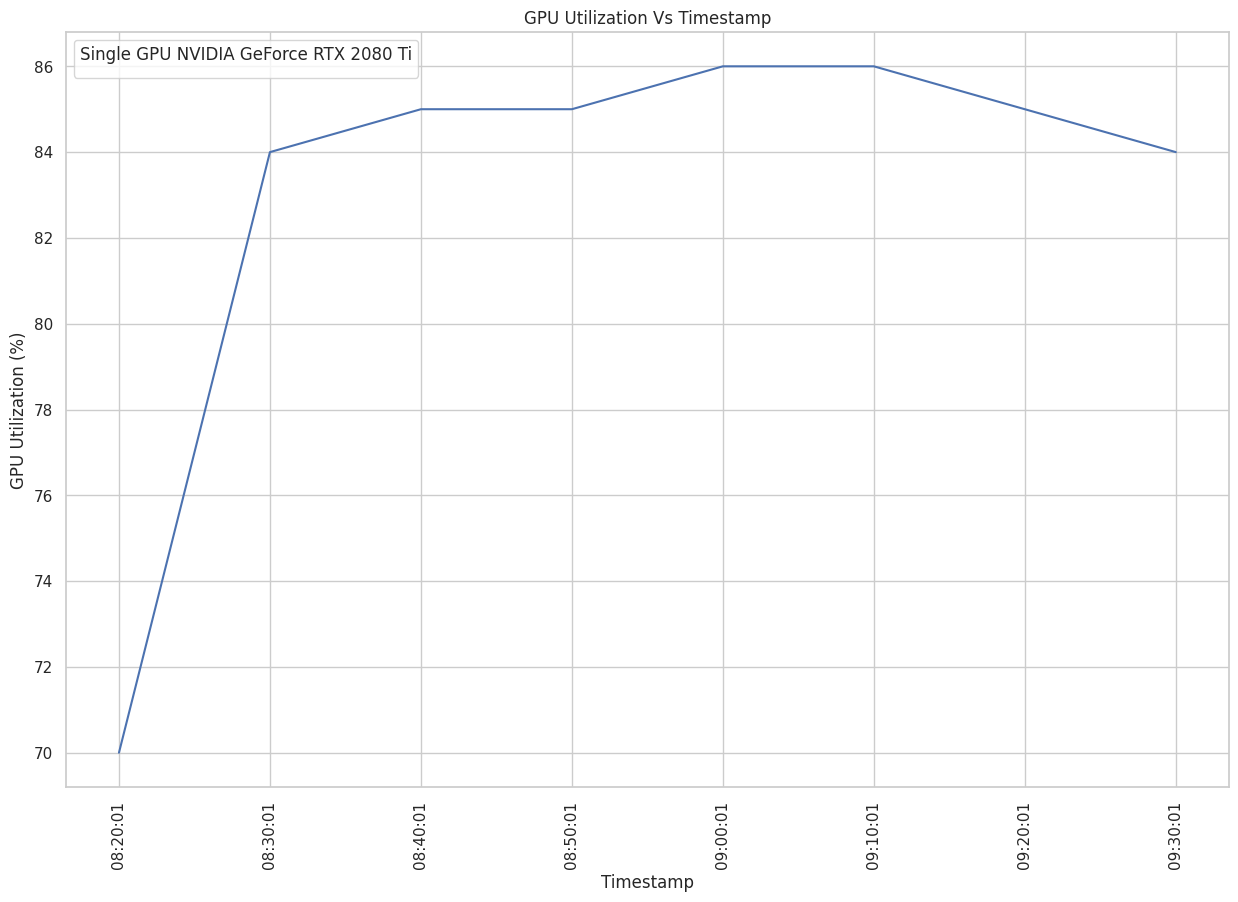

In [ ]:
#Graph of GPU Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.gpu[%]',data=df,palette="viridis")
ax.set(xlabel='Timestamp', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_10_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Timestamp')
plt.show()

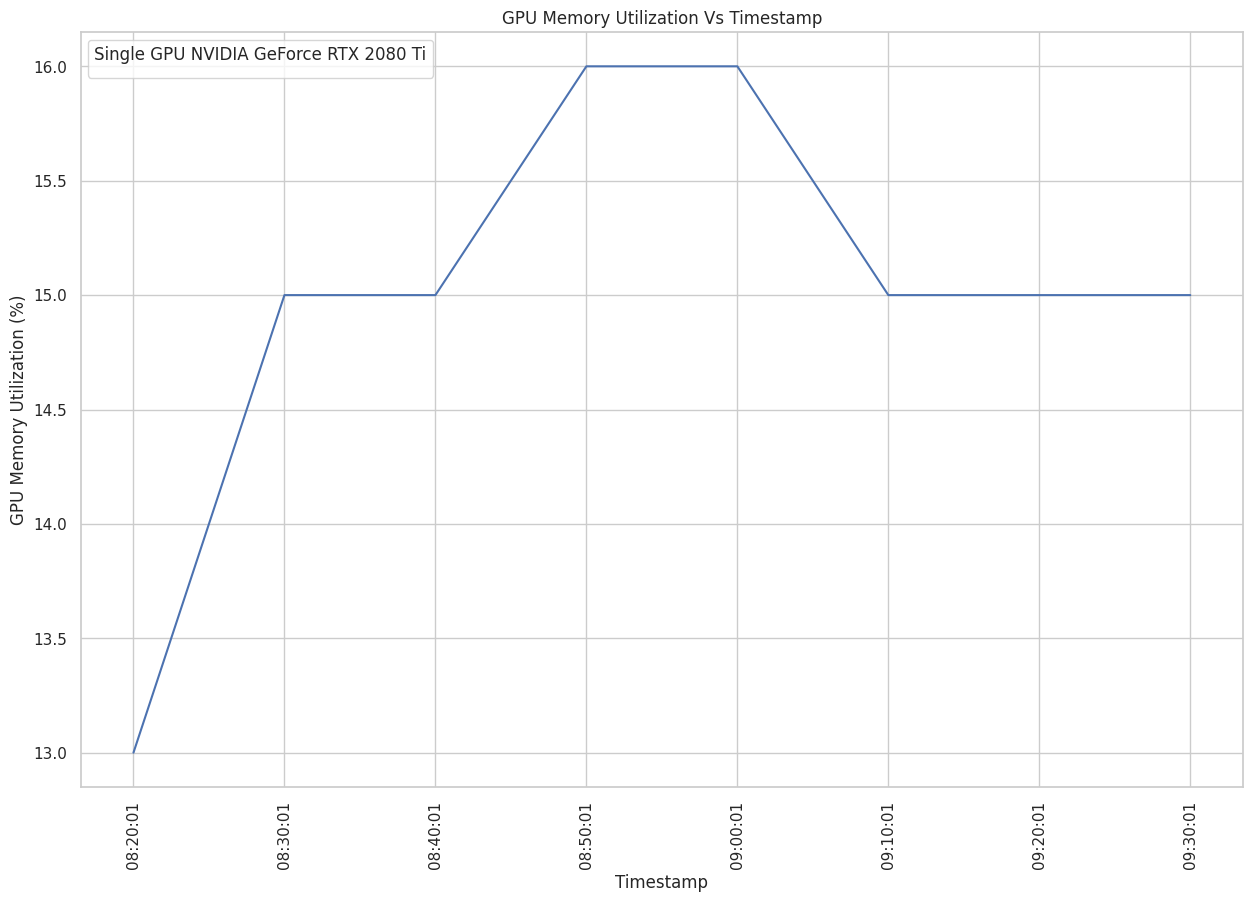

In [ ]:
#Graph of GPU Memory Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.memory[%]',data=df,palette="viridis")
ax.set(xlabel='Timestamp', ylabel='GPU Memory Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Memory_Utilization_10_Min.svg',bbox_inches = 'tight')
plt.title('GPU Memory Utilization Vs Timestamp')
plt.show()

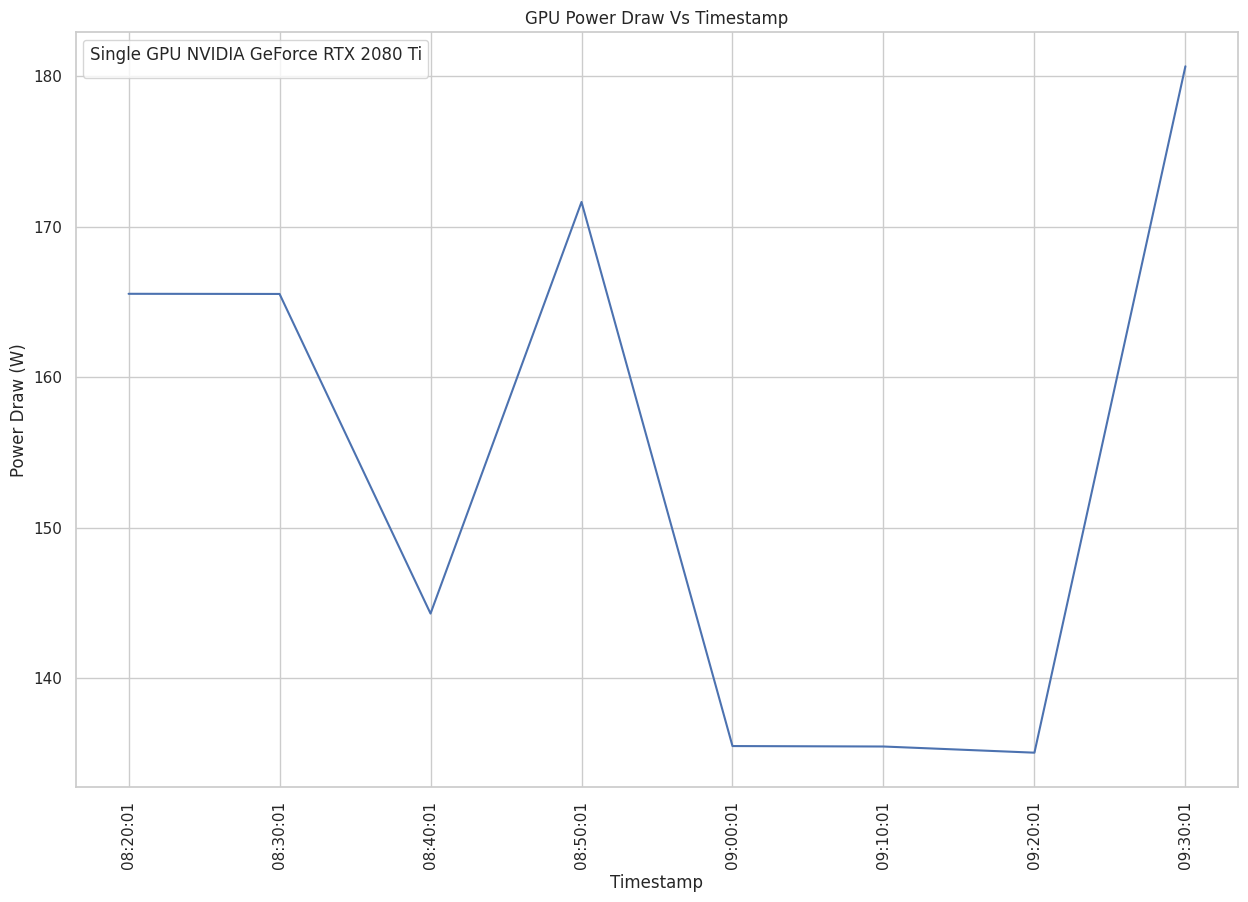

In [ ]:
#Graph of GPU Power Draw Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='power.draw[W]',data=df,palette="viridis")
ax.set(xlabel='Timestamp', ylabel='Power Draw (W)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Power_Draw_10_min.svg',bbox_inches = 'tight')
plt.title('GPU Power Draw Vs Timestamp')
plt.show()

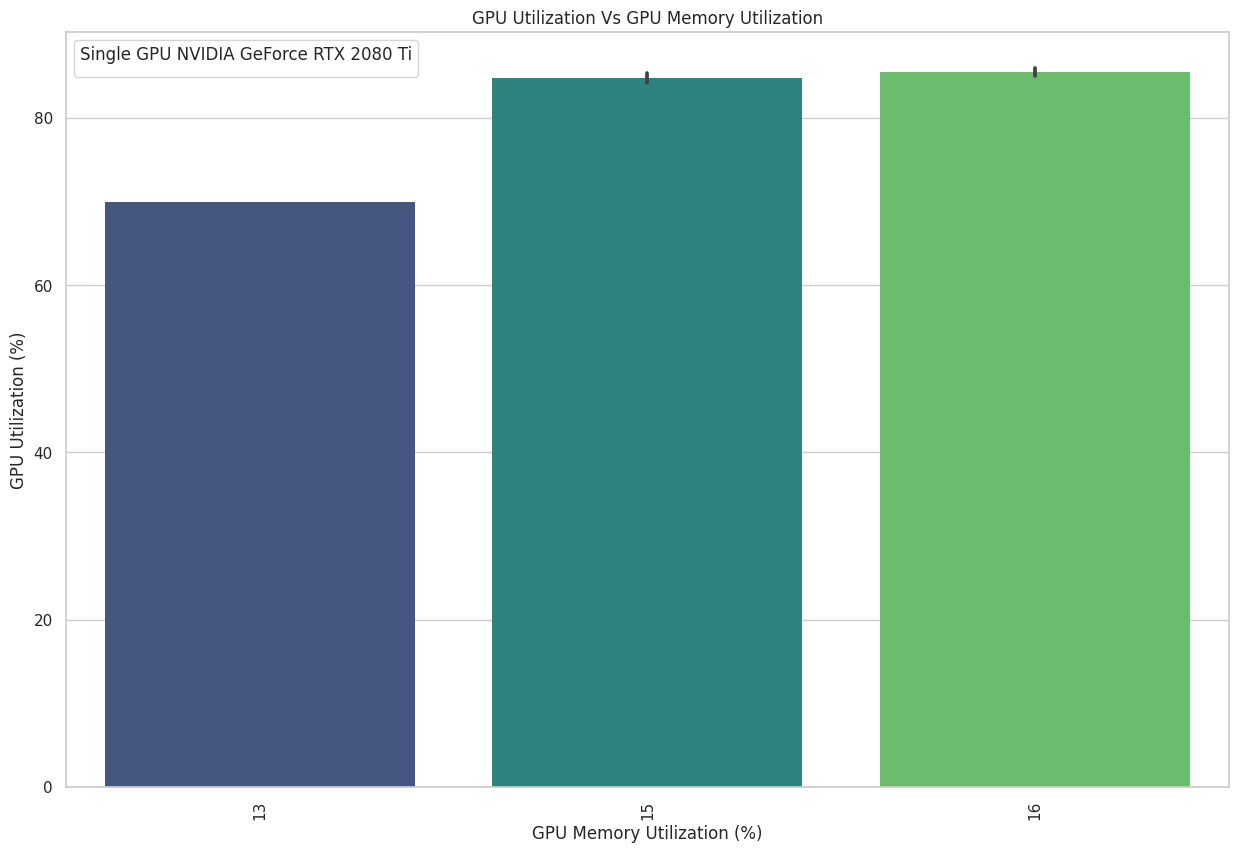

In [ ]:
#Graph of GPU Utilization Vs GPU Memory Utilization
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='utilization.memory[%]',y='utilization.gpu[%]',data=df,palette="viridis")
ax.set(xlabel='GPU Memory Utilization (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_Comp_Memory_10_min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs GPU Memory Utilization')
plt.show()

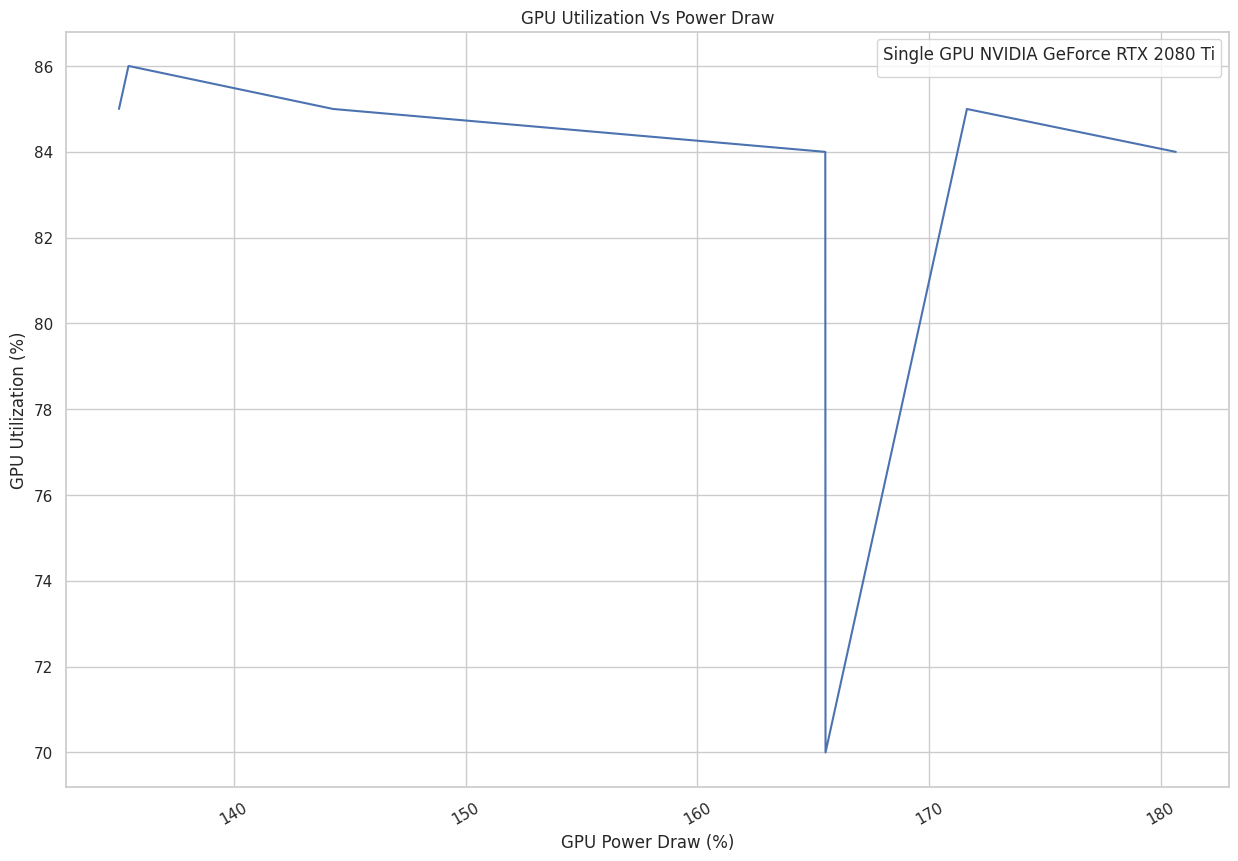

In [ ]:
#Graph of GPU Utilization Vs Power Draw
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='power.draw[W]',y='utilization.gpu[%]',data=df,palette="viridis")
ax.set(xlabel='GPU Power Draw (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper right')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_Comp_Power_10_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Power Draw')
plt.show()

## Multi GPU Characteristic Analysis

In [ ]:
#Data Loading

import pandas as pd
#Specifying file path
base_file_path = "drive/MyDrive/DeepMD_MTP_Project/Code/"

#Reading data using pandas
df = pd.read_csv(base_file_path + 'GPU_Characteristics_Analysis_data/multi_gpu_log_2_min.csv')

#Adding columns as it is not present in file
df.columns = ['timestamp','index','name','pci.bus_id','driver_version','pstate','temperature.gpu','utilization.gpu[%]','utilization.memory[%]','memory.total',
              'memory.free','memory.used[MiB]','fan.speed[%]','power.draw[W]','clocks.current.sm','clocks.current.memory','clocks.current.graphics',
              'pcie.link.gen.max','pcie.link.gen.current']

In [ ]:
df.head(10)

timestamp  index                         name  \
0  2022/09/27 06:08:01.000      1   NVIDIA GeForce RTX 2080 Ti   
1  2022/09/27 06:10:01.000      0   NVIDIA GeForce RTX 2080 Ti   
2  2022/09/27 06:10:01.000      1   NVIDIA GeForce RTX 2080 Ti   
3  2022/09/27 06:12:01.000      0   NVIDIA GeForce RTX 2080 Ti   
4  2022/09/27 06:12:01.000      1   NVIDIA GeForce RTX 2080 Ti   
5  2022/09/27 06:14:01.000      0   NVIDIA GeForce RTX 2080 Ti   
6  2022/09/27 06:14:01.000      1   NVIDIA GeForce RTX 2080 Ti   
7  2022/09/27 06:16:01.000      0   NVIDIA GeForce RTX 2080 Ti   
8  2022/09/27 06:16:01.000      1   NVIDIA GeForce RTX 2080 Ti   
9  2022/09/27 06:18:01.000      0   NVIDIA GeForce RTX 2080 Ti   

          pci.bus_id driver_version pstate  temperature.gpu  \
0   00000000:2D:00.0      515.43.04     P8               57   
1   00000000:15:00.0      515.43.04     P8               38   
2   00000000:2D:00.0      515.43.04     P8               55   
3   00000000:15:00.0      515.43.04     P2               54   
4   00000000:2D:00.0      515.43.04     P2               73   
5   00000000:15:00.0      515.43.04     P2               73   
6   00000000:2D:00.0      515.43.04     P2               87   
7   00000000:15:00.0      515.43.04     P2               79   
8   00000000:2D:00.0      515.43.04     P2               88   
9   00000000:15:00.0      515.43.04     P2               82   

  utilization.gpu[%] utilization.memory[%] memory.total memory.free  \
0                0 %                   0 %    11264 MiB   10785 MiB   
1                0 %                   0 %    11264 MiB   11005 MiB   
2                0 %                   0 %    11264 MiB   10783 MiB   
3               79 %                  13 %    11264 MiB    9404 MiB   
4               69 %                  13 %    11264 MiB    9693 MiB   
5               75 %                  12 %    11264 MiB    9404 MiB   
6               77 %                  12 %    11264 MiB    9693 MiB   
7               76 %                  12 %    11264 MiB    9404 MiB   
8               78 %                  12 %    11264 MiB    9693 MiB   
9               78 %                  12 %    11264 MiB    9404 MiB   

  memory.used[MiB] fan.speed[%] power.draw[W] clocks.current.sm  \
0          230 MiB         31 %       20.29 W           300 MHz   
1           13 MiB         30 %       20.39 W           300 MHz   
2          233 MiB         30 %       19.94 W           300 MHz   
3         1614 MiB         30 %      142.88 W          1830 MHz   
4         1322 MiB         37 %      144.26 W          1800 MHz   
5         1614 MiB         37 %      154.30 W          1785 MHz   
6         1322 MiB         50 %      106.82 W          1365 MHz   
7         1614 MiB         43 %      165.89 W          1785 MHz   
8         1322 MiB         65 %      106.76 W          1350 MHz   
9         1614 MiB         46 %      169.59 W          1770 MHz   

  clocks.current.memory clocks.current.graphics  pcie.link.gen.max  \
0               405 MHz                 300 MHz                  3   
1               405 MHz                 300 MHz                  3   
2               405 MHz                 300 MHz                  3   
3              6800 MHz                1830 MHz                  3   
4              6800 MHz                1800 MHz                  3   
5              6800 MHz                1785 MHz                  3   
6              6800 MHz                1365 MHz                  3   
7              6800 MHz                1785 MHz                  3   
8              6800 MHz                1350 MHz                  3   
9              6800 MHz                1770 MHz                  3   

   pcie.link.gen.current  
0                      1  
1                      1  
2                      1  
3                      3  
4                      3  
5                      3  
6                      3  
7                      3  
8                      3  
9                      3

In [ ]:
df['utilization.gpu[%]'].unique()

array([' 0 %', ' 79 %', ' 75 %', ' 76 %', ' 78 %', ' 81 %', ' 83 %',
       ' 77 %', ' 74 %', ' 73 %', ' 80 %', ' 60 %'], dtype=object)

In [ ]:
df['utilization.gpu[%]'] = df['utilization.gpu[%]'].apply(remove_percent)
df['utilization.memory[%]'] = df['utilization.memory[%]'].apply(remove_percent)
df['memory.used[MiB]'] = df['memory.used[MiB]'].apply(remove_MiB_unit)
df['power.draw[W]'] = df['power.draw[W]'].apply(remove_W_unit)
df['fan.speed[%]'] = df['fan.speed[%]'].apply(remove_percent)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%H:%M:%S')

In [ ]:
#Filtering out data
df = df[df['utilization.gpu[%]'] > 0]

In [ ]:
len(df)

110

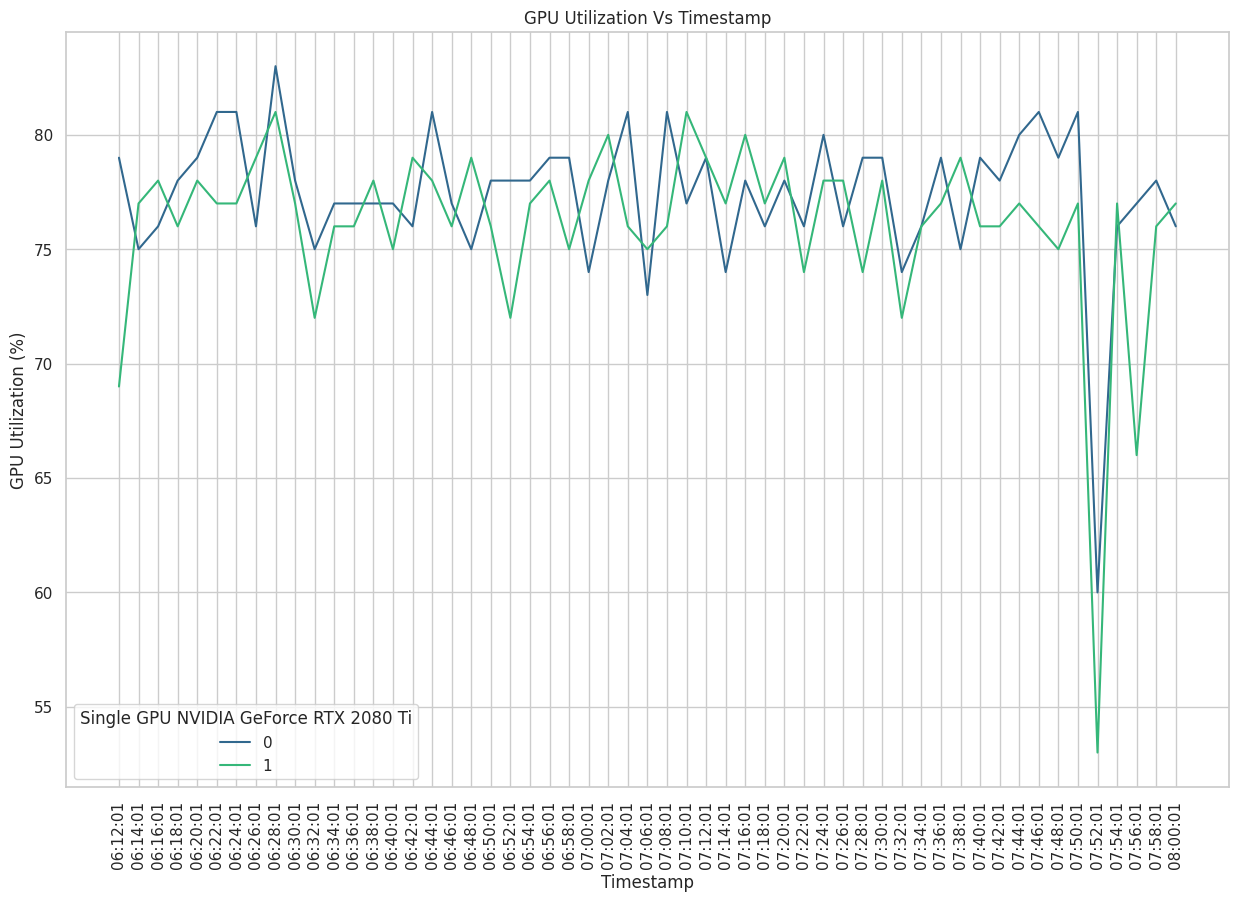

In [ ]:
#Graph of GPU Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.gpu[%]',data=df,palette="viridis",hue='index')
ax.set(xlabel='Timestamp', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='lower left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_Multi_GPU_Utilization_2_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Timestamp')
plt.show()

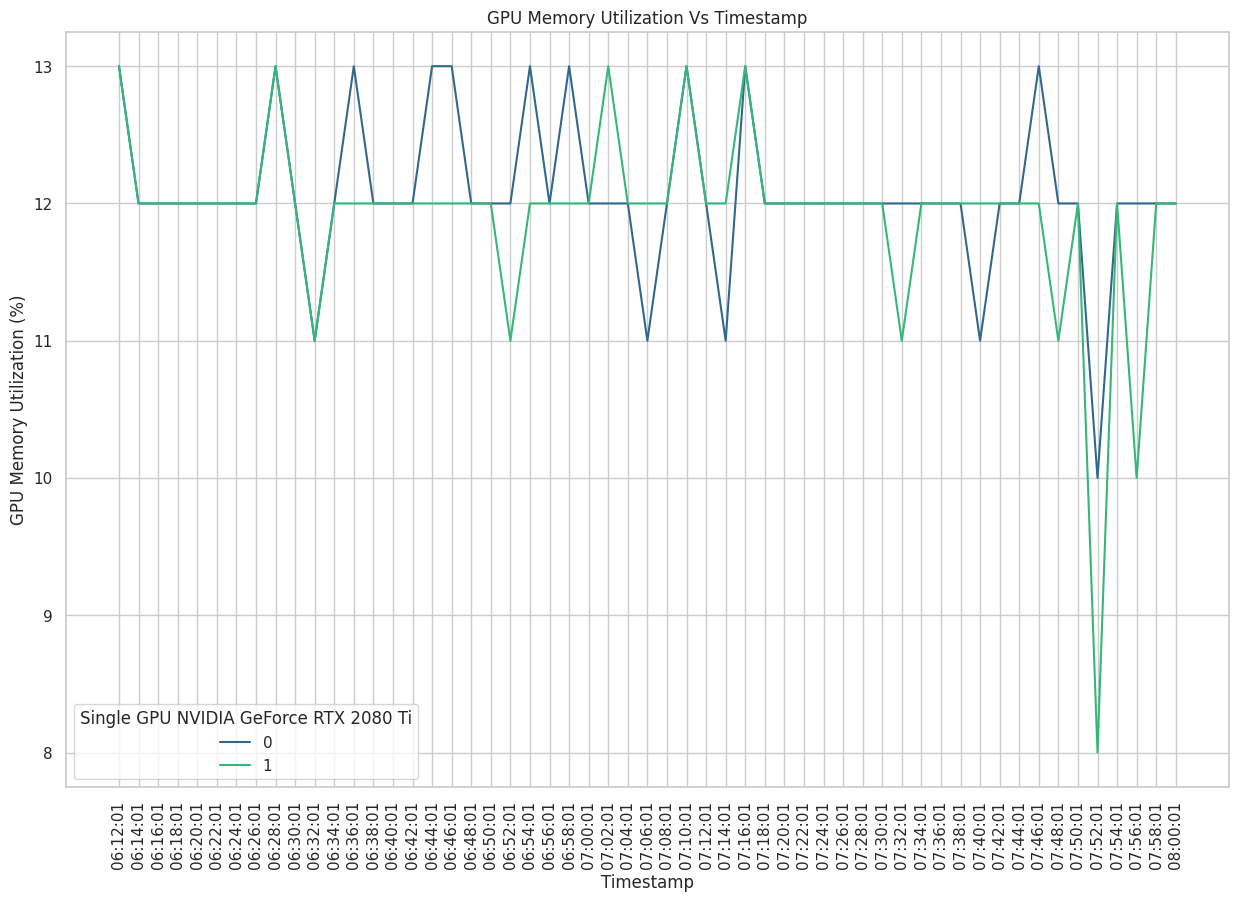

In [ ]:
#Graph of GPU Memory Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.memory[%]',data=df,palette="viridis",hue='index')
ax.set(xlabel='Timestamp', ylabel='GPU Memory Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='lower left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_Multi_GPU_Memory_Utilization_2_Min.svg',bbox_inches = 'tight')
plt.title('GPU Memory Utilization Vs Timestamp')
plt.show()

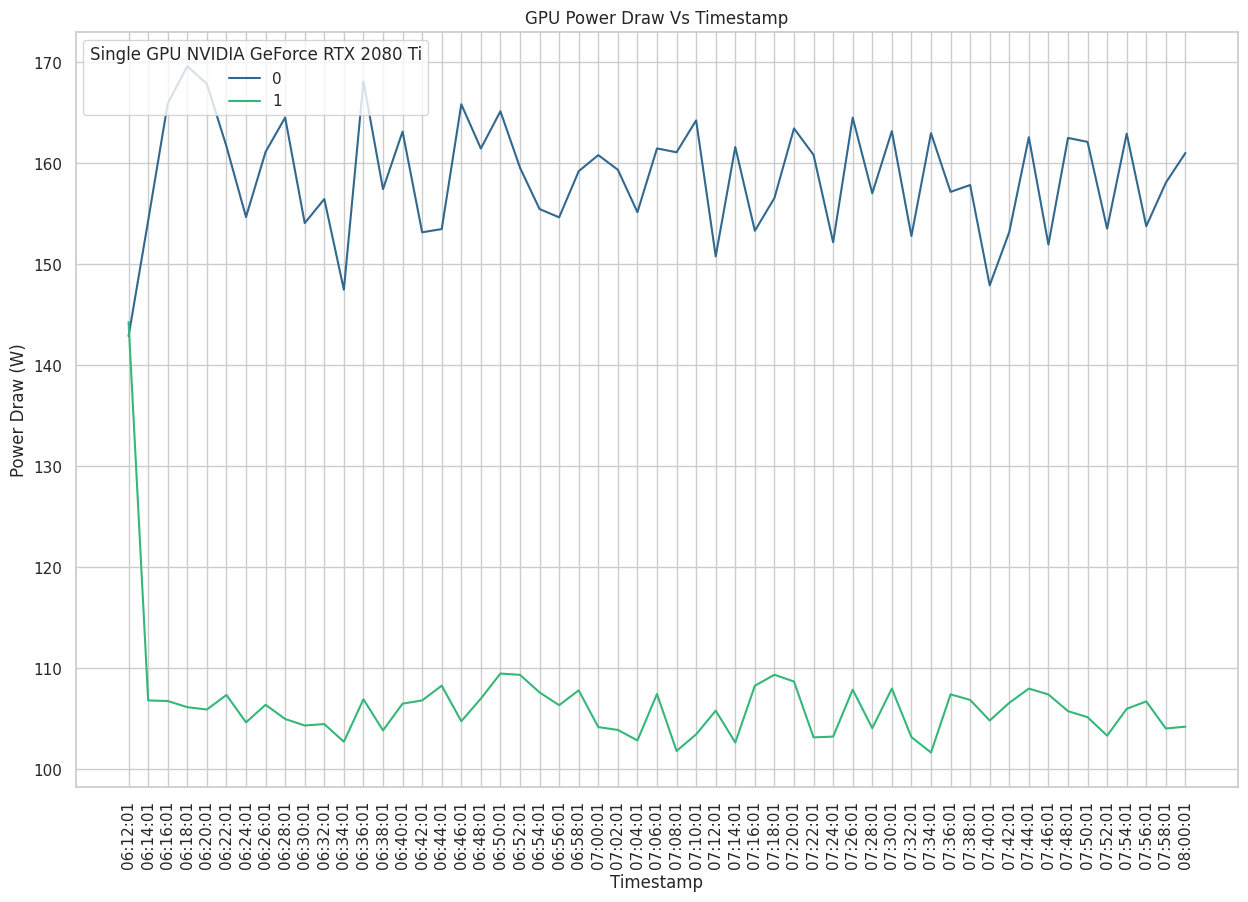

In [ ]:
#Graph of GPU Power Draw Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='power.draw[W]',data=df,palette="viridis",hue='index')
ax.set(xlabel='Timestamp', ylabel='Power Draw (W)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_Multi_GPU_Power_Draw_2_min.svg',bbox_inches = 'tight')
plt.title('GPU Power Draw Vs Timestamp')
plt.show()

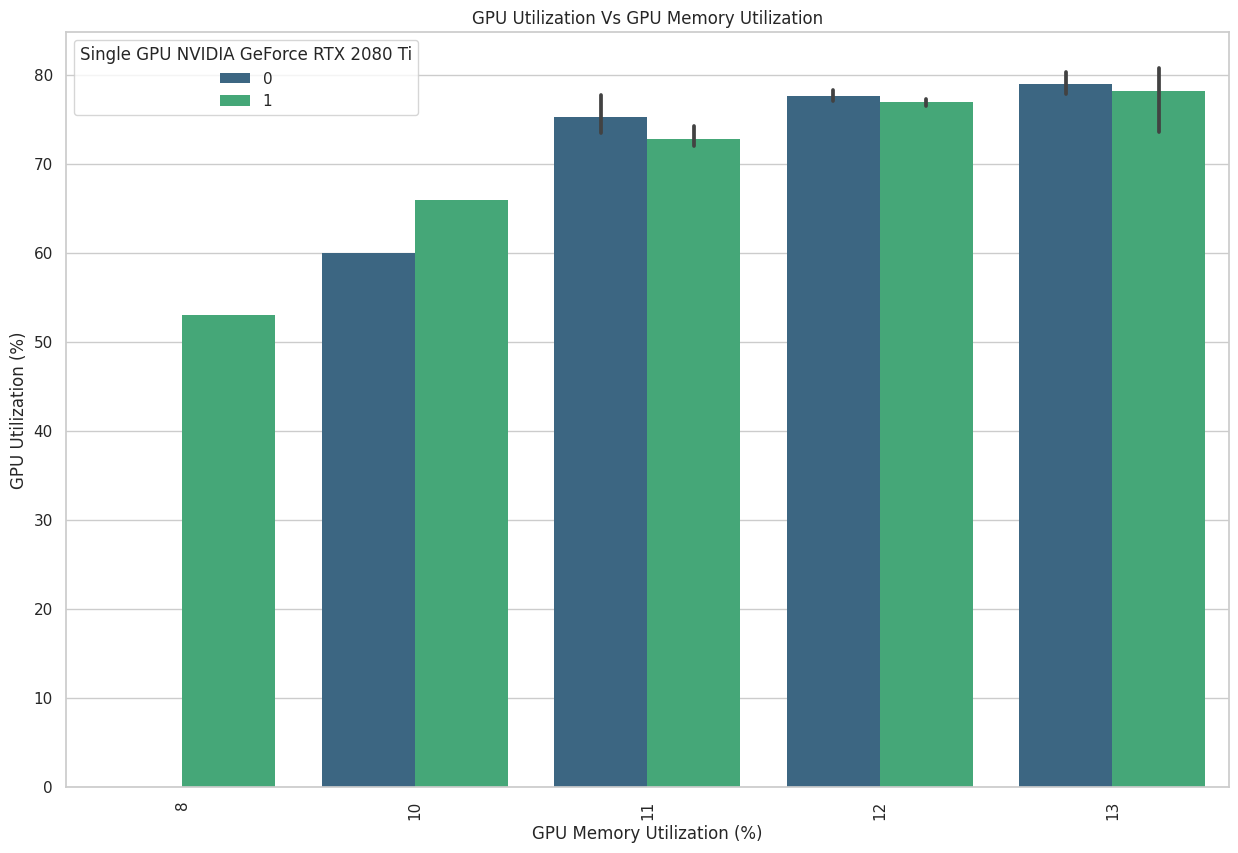

In [ ]:
#Graph of GPU Utilization Vs GPU Memory Utilization
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='utilization.memory[%]',y='utilization.gpu[%]',data=df,palette="viridis",hue='index')
ax.set(xlabel='GPU Memory Utilization (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_Comp_Memory_2_min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs GPU Memory Utilization')
plt.show()

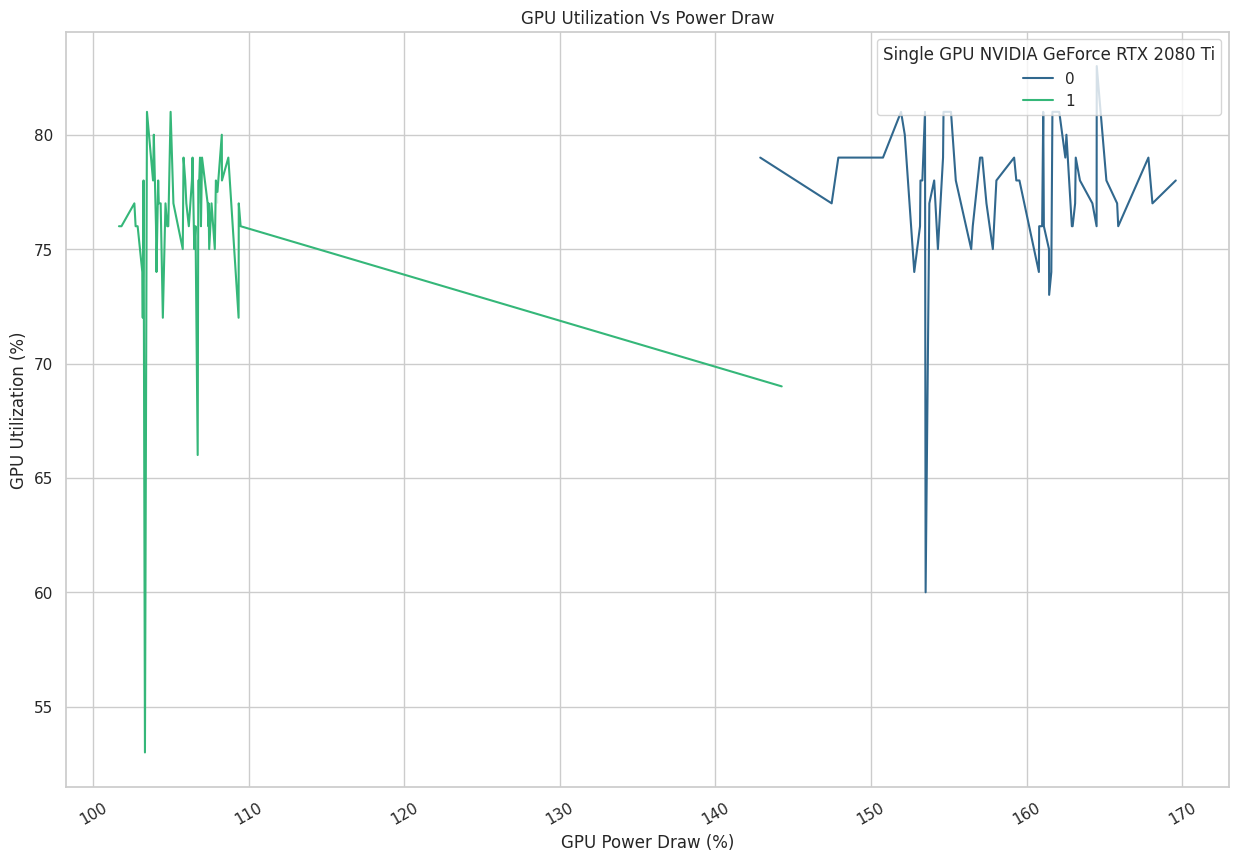

In [ ]:
#Graph of GPU Utilization Vs Power Draw
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='power.draw[W]',y='utilization.gpu[%]',data=df,palette="viridis",hue='index')
ax.set(xlabel='GPU Power Draw (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'Single GPU NVIDIA GeForce RTX 2080 Ti', loc='upper right')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_Multi_GPU_Utilization_Comp_Power_2_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Power Draw')
plt.show()

## V100


In [ ]:
#Data Loading

import pandas as pd
#Specifying file path
base_file_path = "drive/MyDrive/DeepMD_MTP_Project/Code/"

#Reading data using pandas
df = pd.read_csv(base_file_path + 'GPU_Characteristics_Analysis_data/v100_1000k_log.csv')

#Adding columns as it is not present in file
df.columns = ['timestamp','index','name','pci.bus_id','driver_version','pstate','temperature.gpu','utilization.gpu[%]','utilization.memory[%]','memory.total',
              'memory.free','memory.used[MiB]','fan.speed[%]','power.draw[W]','clocks.current.sm','clocks.current.memory','clocks.current.graphics',
              'pcie.link.gen.max','pcie.link.gen.current']

In [ ]:
df.head(10)

timestamp  index                   name         pci.bus_id  \
0  2022/11/07 10:34:01.000      1   Tesla V100-SXM2-32GB   00000000:07:00.0   
1  2022/11/07 10:34:01.000      2   Tesla V100-SXM2-32GB   00000000:0A:00.0   
2  2022/11/07 10:34:01.000      3   Tesla V100-SXM2-32GB   00000000:0B:00.0   
3  2022/11/07 10:34:01.000      4   Tesla V100-SXM2-32GB   00000000:85:00.0   
4  2022/11/07 10:34:01.000      5   Tesla V100-SXM2-32GB   00000000:86:00.0   
5  2022/11/07 10:34:01.000      6   Tesla V100-SXM2-32GB   00000000:89:00.0   
6  2022/11/07 10:34:01.000      7   Tesla V100-SXM2-32GB   00000000:8A:00.0   
7  2022/11/07 10:35:01.000      0   Tesla V100-SXM2-32GB   00000000:06:00.0   
8  2022/11/07 10:35:01.000      1   Tesla V100-SXM2-32GB   00000000:07:00.0   
9  2022/11/07 10:35:01.000      2   Tesla V100-SXM2-32GB   00000000:0A:00.0   

  driver_version pstate  temperature.gpu utilization.gpu[%]  \
0      515.65.01     P0               54               61 %   
1      515.65.01     P0               54               70 %   
2      515.65.01     P0               49               89 %   
3      515.65.01     P0               50              100 %   
4      515.65.01     P0               54               78 %   
5      515.65.01     P0               58               81 %   
6      515.65.01     P0               50               81 %   
7      515.65.01     P0               50              100 %   
8      515.65.01     P0               52               77 %   
9      515.65.01     P0               52               74 %   

  utilization.memory[%] memory.total memory.free memory.used[MiB]  \
0                  34 %    32768 MiB   10768 MiB        21741 MiB   
1                  40 %    32768 MiB   10768 MiB        21741 MiB   
2                  55 %    32768 MiB   10768 MiB        21741 MiB   
3                  53 %    32768 MiB   10768 MiB        21741 MiB   
4                  43 %    32768 MiB   10768 MiB        21741 MiB   
5                  50 %    32768 MiB   10768 MiB        21741 MiB   
6                  44 %    32768 MiB   10768 MiB        21741 MiB   
7                  60 %    32768 MiB   10768 MiB        21741 MiB   
8                  43 %    32768 MiB   10768 MiB        21741 MiB   
9                  45 %    32768 MiB   10768 MiB        21741 MiB   

  fan.speed[%] power.draw[W] clocks.current.sm clocks.current.memory  \
0        [N/A]      324.32 W          1485 MHz               877 MHz   
1        [N/A]      218.49 W          1477 MHz               877 MHz   
2        [N/A]       99.26 W          1470 MHz               877 MHz   
3        [N/A]      189.92 W          1485 MHz               877 MHz   
4        [N/A]      216.59 W          1492 MHz               877 MHz   
5        [N/A]      278.48 W          1507 MHz               877 MHz   
6        [N/A]      281.25 W          1425 MHz               877 MHz   
7        [N/A]      163.10 W          1500 MHz               877 MHz   
8        [N/A]       78.24 W          1455 MHz               877 MHz   
9        [N/A]      198.60 W          1530 MHz               877 MHz   

  clocks.current.graphics  pcie.link.gen.max  pcie.link.gen.current  
0                1485 MHz                  3                      3  
1                1477 MHz                  3                      3  
2                1470 MHz                  3                      3  
3                1485 MHz                  3                      3  
4                1492 MHz                  3                      3  
5                1507 MHz                  3                      3  
6                1425 MHz                  3                      3  
7                1500 MHz                  3                      3  
8                1455 MHz                  3                      3  
9                1530 MHz                  3                      3

In [ ]:
df['fan.speed[%]'].unique()

array([' [N/A]'], dtype=object)

In [ ]:
df['utilization.gpu[%]'] = df['utilization.gpu[%]'].apply(remove_percent)
df['utilization.memory[%]'] = df['utilization.memory[%]'].apply(remove_percent)
df['memory.used[MiB]'] = df['memory.used[MiB]'].apply(remove_MiB_unit)
df['power.draw[W]'] = df['power.draw[W]'].apply(remove_W_unit)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%H:%M:%S')

In [ ]:
#Filtering out data
df = df[df['utilization.gpu[%]'] > 0]

In [ ]:
len(df)

126

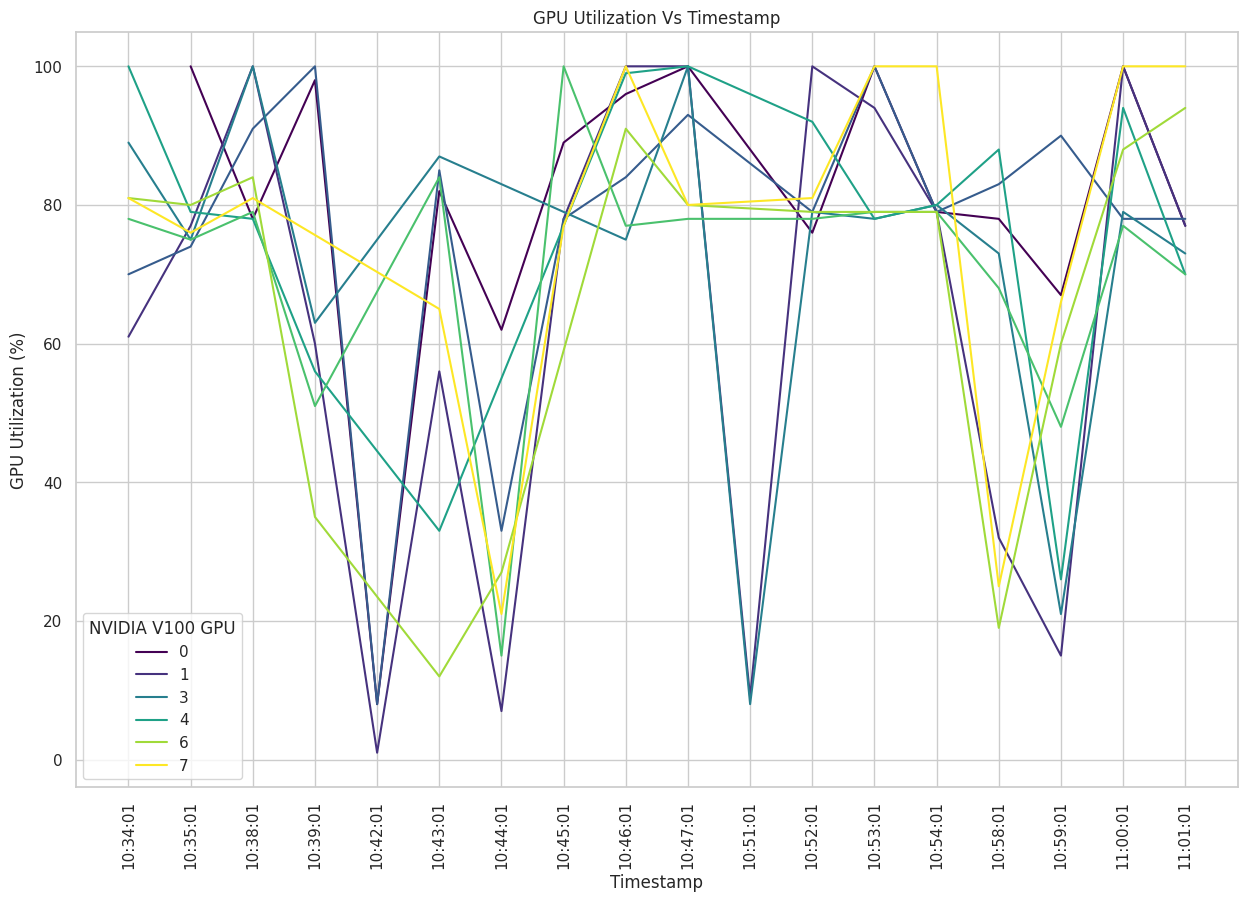

In [ ]:
#Graph of GPU Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.gpu[%]',data=df,palette="viridis",hue='index')
ax.set(xlabel='Timestamp', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'NVIDIA V100 GPU', loc='lower left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/V100_GPU_Utilization_2_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Timestamp')
plt.show()

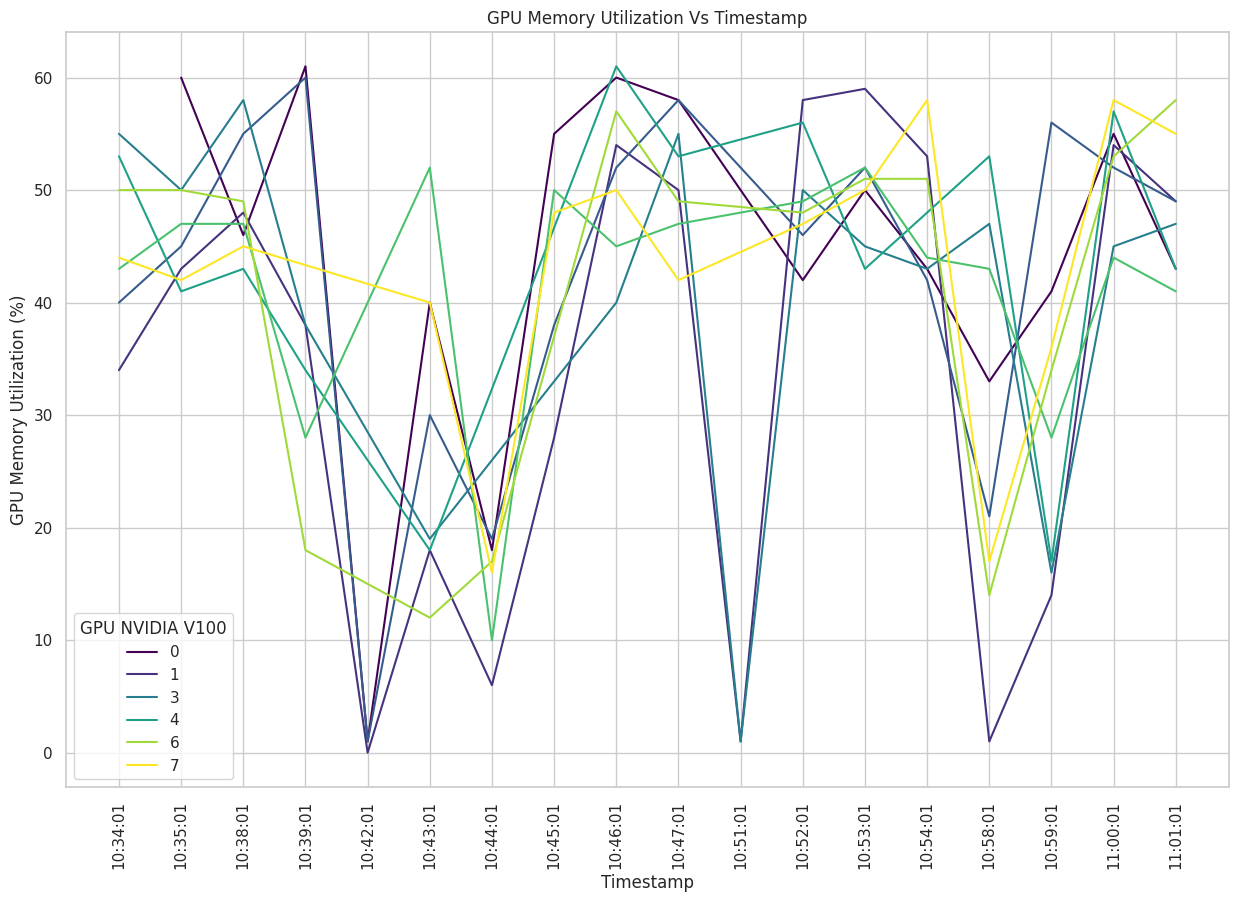

In [ ]:
#Graph of GPU Memory Utilization Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='utilization.memory[%]',data=df,palette="viridis",hue='index')
ax.set(xlabel='Timestamp', ylabel='GPU Memory Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'GPU NVIDIA V100', loc='lower left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_Multi_GPU_Memory_Utilization_2_Min.svg',bbox_inches = 'tight')
plt.title('GPU Memory Utilization Vs Timestamp')
plt.show()

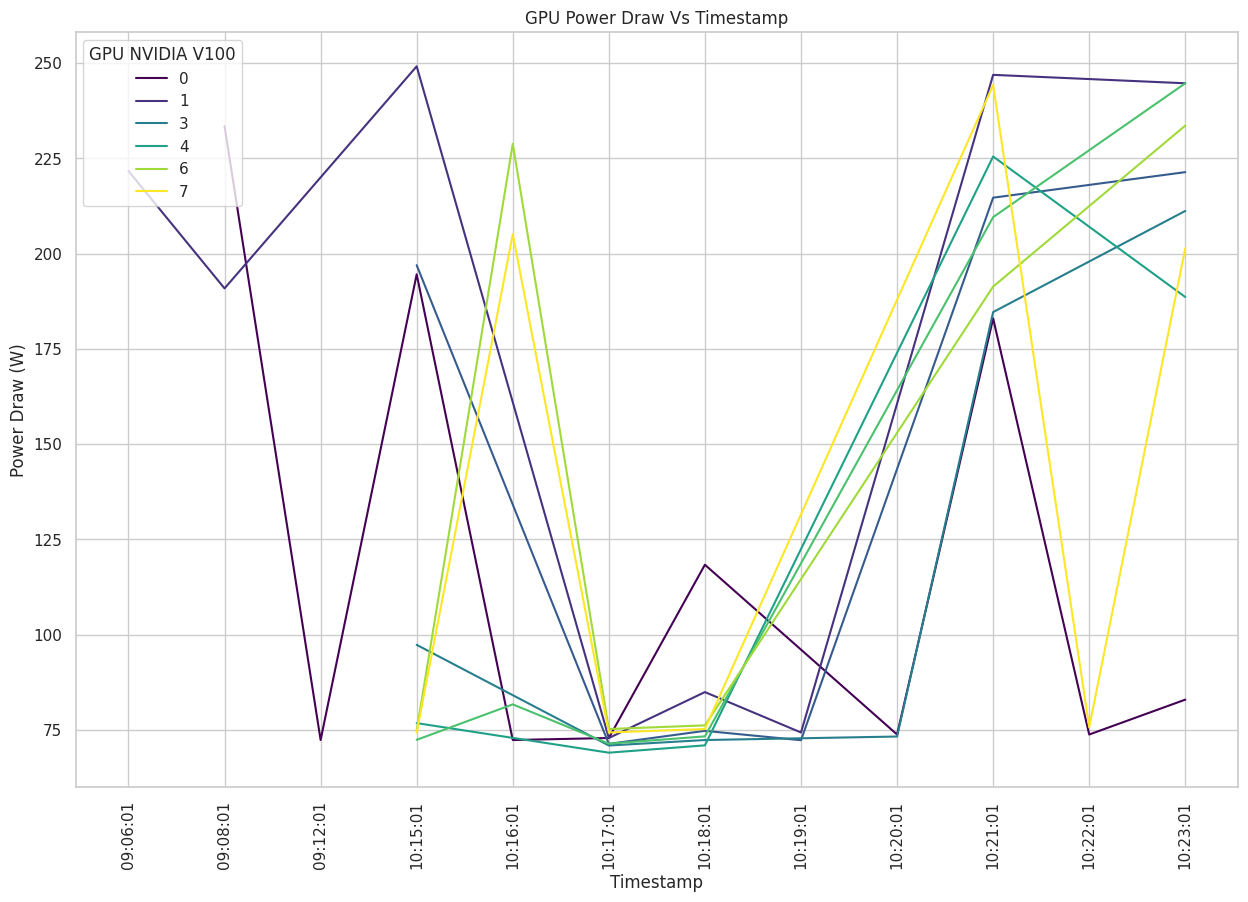

In [ ]:
#Graph of GPU Power Draw Vs Timestamp
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='timestamp',y='power.draw[W]',data=df,palette="viridis",hue='index')
ax.set(xlabel='Timestamp', ylabel='Power Draw (W)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'GPU NVIDIA V100', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_Multi_GPU_Power_Draw_2_min.svg',bbox_inches = 'tight')
plt.title('GPU Power Draw Vs Timestamp')
plt.show()

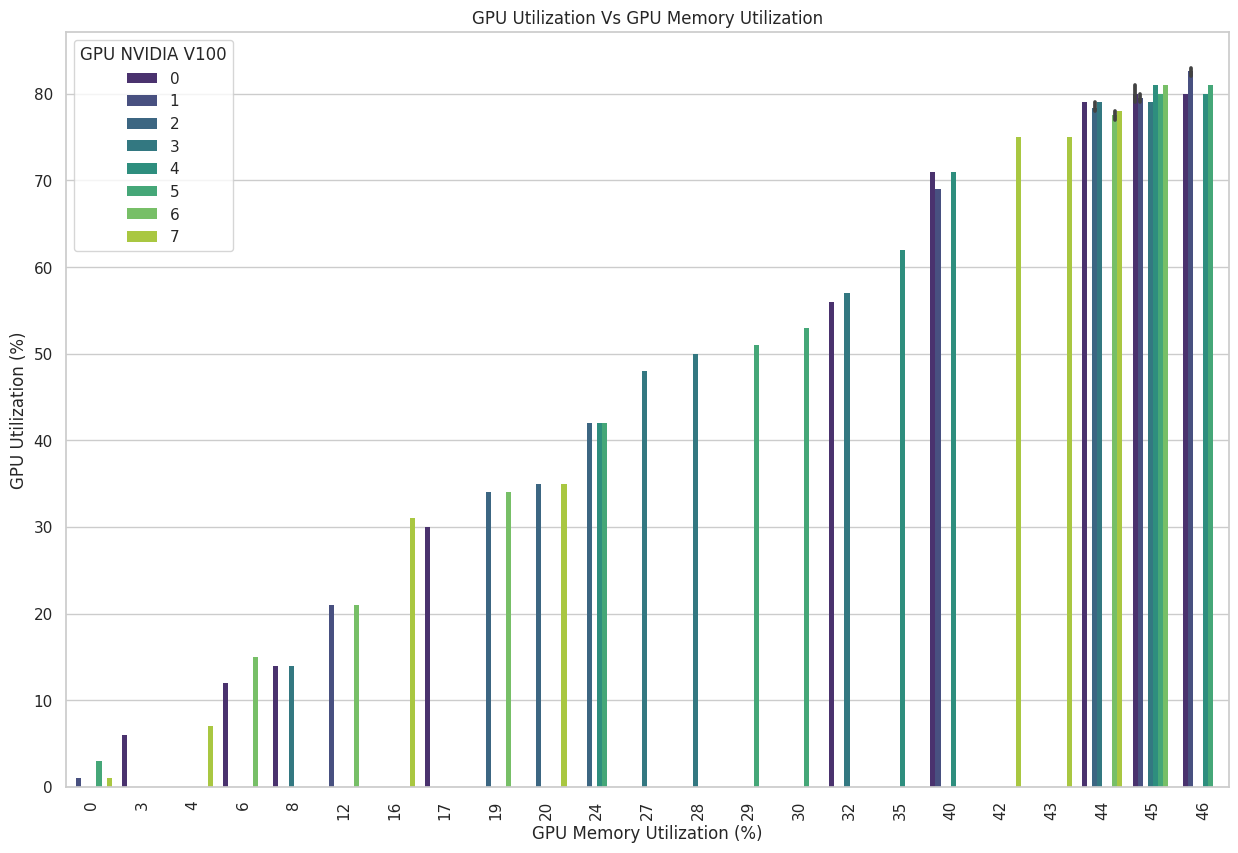

In [ ]:
#Graph of GPU Utilization Vs GPU Memory Utilization
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='utilization.memory[%]',y='utilization.gpu[%]',data=df,palette="viridis",hue='index')
ax.set(xlabel='GPU Memory Utilization (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=90)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'GPU NVIDIA V100', loc='upper left')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_GPU_Utilization_Comp_Memory_2_min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs GPU Memory Utilization')
plt.show()

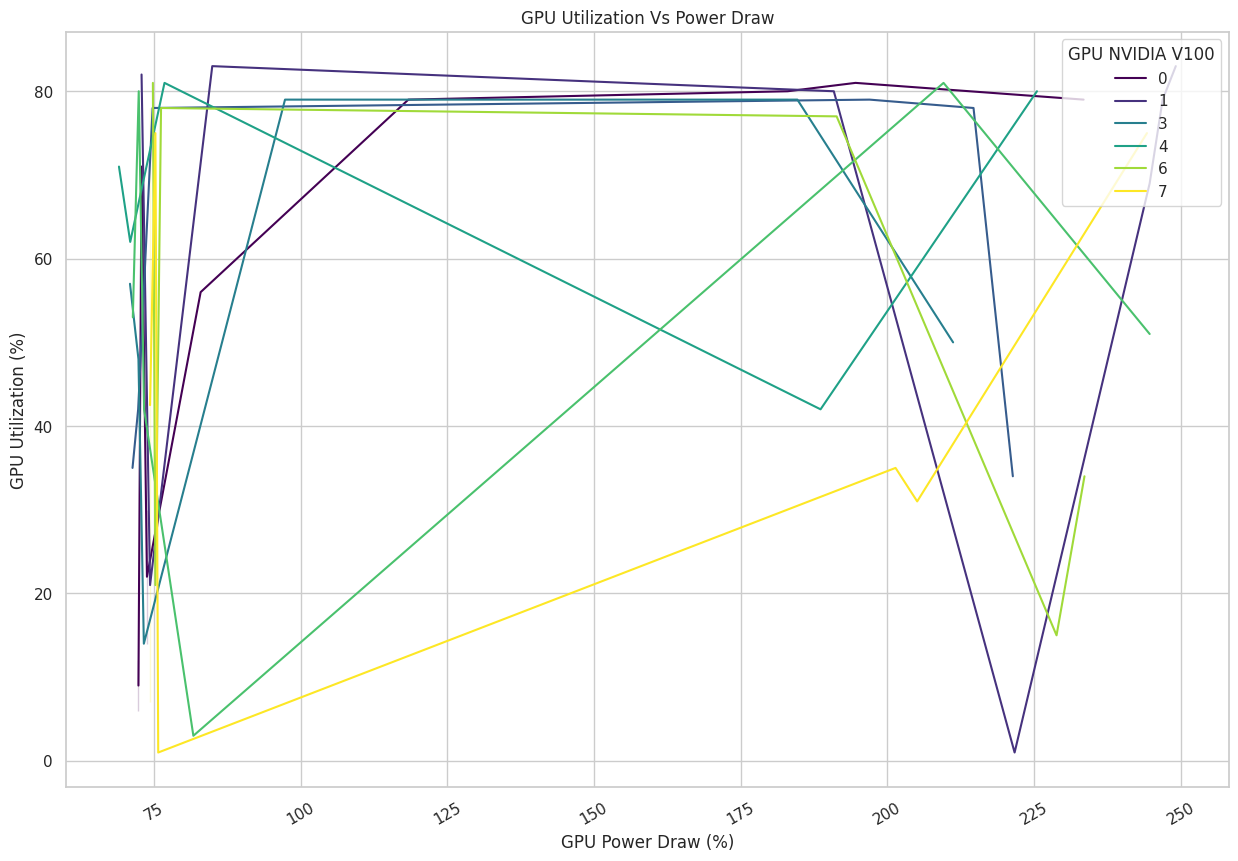

In [ ]:
#Graph of GPU Utilization Vs Power Draw
plt.figure(figsize=(15,10),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='power.draw[W]',y='utilization.gpu[%]',data=df,palette="viridis",hue='index')
ax.set(xlabel='GPU Power Draw (%)', ylabel='GPU Utilization (%)')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.patches, linewidth=0)
plt.legend(title = 'GPU NVIDIA V100', loc='upper right')
plt.savefig(base_file_path + 'GPU_Characteristics_Analysis_Graph/Ti_Multi_GPU_Utilization_Comp_Power_2_Min.svg',bbox_inches = 'tight')
plt.title('GPU Utilization Vs Power Draw')
plt.show()

##Training Time Analysis

In [ ]:
#Utility Functions

def speedup_list(perf_lst):
    result = [1]
    max_val = max(perf_lst)
    for idx in range(1,len(perf_lst)):
        speedup = math.ceil(max_val/perf_lst[idx])
        result.append(speedup)
    return result

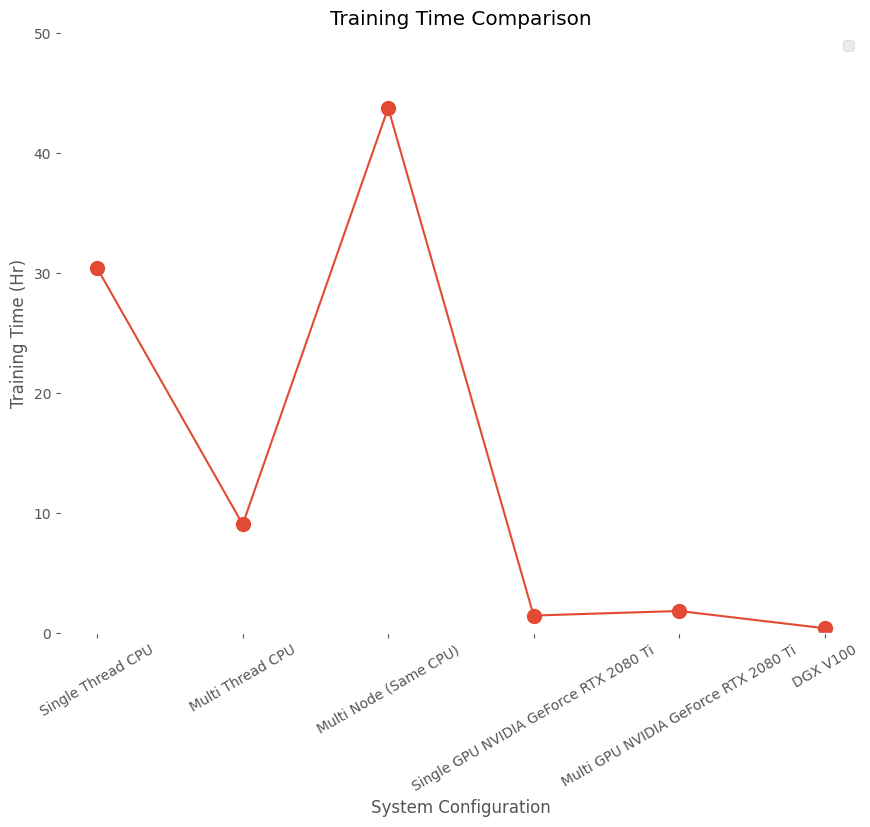

In [ ]:
#For ice_pimd --  
training_time = [109438.949/3600,32646/3600,157562.562/3600,5277.362/3600,6652.994/3600,1482.384/3600]
label = ['Single Thread CPU','Multi Thread CPU','Multi Node (Same CPU)','Single GPU NVIDIA GeForce RTX 2080 Ti','Multi GPU NVIDIA GeForce RTX 2080 Ti','DGX V100']

#Creating Canvas
fig = plt.figure(figsize=(8,6),dpi=100)
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Training Time (Hr)')
ax.set_xlabel('System Configuration')
ax.set_title('Training Time Comparison')

#Creating Multiline Plot
ax.plot(label,training_time,marker='o',ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend()
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Training_Time_Graph/cpu_gpu_training_time_comp.svg',bbox_inches = 'tight')
plt.ylim(0,50)
plt.show()
plt.close()

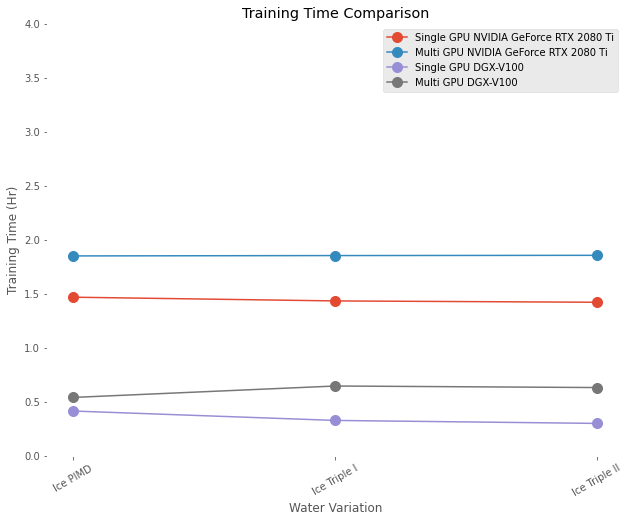

In [ ]:
#For ice_pimd --  
single_gpu_training_time = [5277.362/3600,5152.924/3600,5108.613/3600]
V100_single_gpu_training_time = [1482.384/3600,1169.563/3600,1070.287/3600]
multi_gpu_training_time = [6652.994/3600,6664.956/3600,6673.218/3600]
V100_multi_gpu_training_time = [1936.494/3600,2316.840/3600,2265.492/3600]


label = ['Ice PIMD','Ice Triple I','Ice Triple II']

#Creating Canvas
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Training Time (Hr)')
ax.set_xlabel('Water Variation')
ax.set_title('Training Time Comparison')

#Creating Multiline Plot
ax.plot(label,single_gpu_training_time,marker='o',label="Single GPU NVIDIA GeForce RTX 2080 Ti",ms=10)
ax.plot(label,multi_gpu_training_time,marker='o',label="Multi GPU NVIDIA GeForce RTX 2080 Ti",ms=10)
ax.plot(label,V100_single_gpu_training_time,marker='o',label="Single GPU DGX-V100",ms=10)
ax.plot(label,V100_multi_gpu_training_time,marker='o',label="Multi GPU DGX-V100",ms=10)
ax.plot()

ax.grid(False)
ax.set_facecolor('white')
ax.legend( loc='upper right' )
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Training_Time_Graph/gpu_ice_training_time_comp.svg',bbox_inches = 'tight')
plt.ylim(0,4)
plt.show()
plt.close()

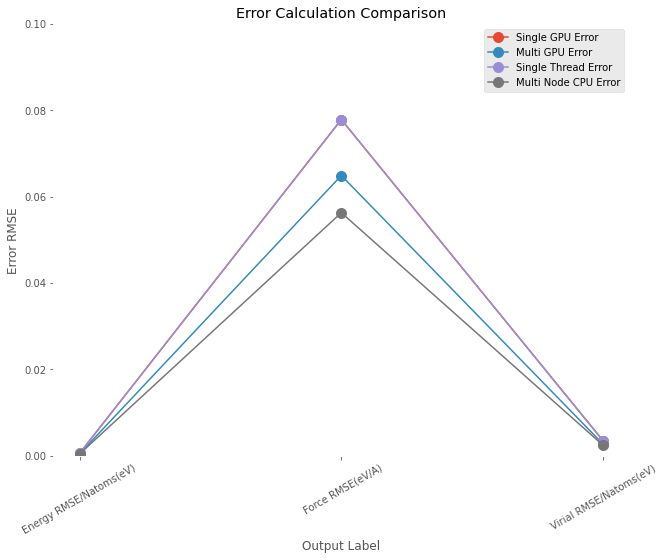

In [ ]:
#Error Calculation
#For ice_pimd
## Dataset - 100 atoms
labels = ["Energy RMSE/Natoms(eV)"," Force RMSE(eV/A)","Virial RMSE/Natoms(eV)"]
single_gpu_error = [5.496534e-04,7.784185e-02,3.479290e-03]
multi_gpu_error = [ 4.515450e-04, 6.488725e-02,2.687099e-03]
single_thread_cpu_error = [5.496534e-04,7.784185e-02,3.479290e-03]
multi_thread_cpu_error = [5.496534e-04,7.784185e-02,3.479290e-03]
multi_node_cpu_error = [  4.050319e-04, 5.627675e-02, 2.426874e-03]

#Creating Canvas
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Error RMSE')
ax.set_xlabel('Output Label')
ax.set_title('Error Calculation Comparison')

#Creating Multiline Plot
ax.plot(labels,single_gpu_error,marker='o',label="Single GPU Error",ms=10)
ax.plot(labels,multi_gpu_error,marker='o',label="Multi GPU Error",ms=10)
ax.plot(labels,single_thread_cpu_error,marker='o',label="Single Thread Error",ms=10)
#ax.plot(labels,multi_thread_cpu_error,marker='o',label="Multi Thread Error",ms=10)
ax.plot(labels,multi_node_cpu_error,marker='o',label="Multi Node CPU Error",ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend( loc='upper right' )
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Training_Time_Graph/ice_pimd_error_comp.svg',bbox_inches = 'tight')
plt.ylim(0,0.1)
plt.show()
plt.close()

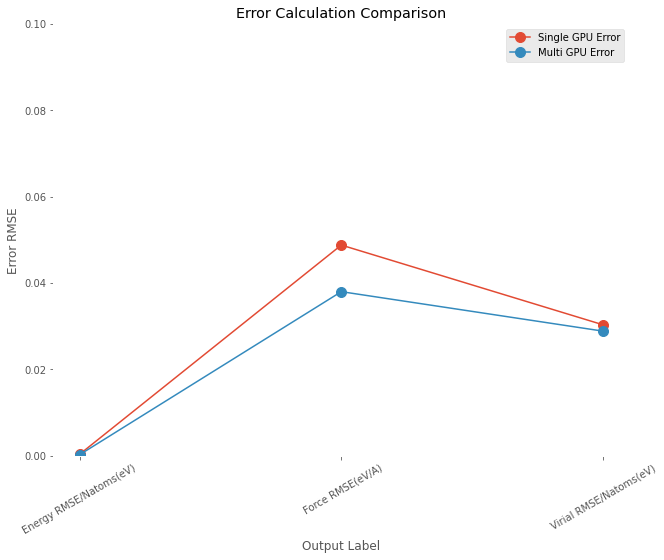

In [ ]:
#Error Calculation
#For ice_triple_I
## Dataset - 100 atoms
labels = ["Energy RMSE/Natoms(eV)"," Force RMSE(eV/A)","Virial RMSE/Natoms(eV)"]
single_gpu_error = [ 3.387013e-04, 4.878758e-02, 3.032373e-02]
multi_gpu_error = [  2.411589e-04, 3.800232e-02,2.886050e-02]

#Creating Canvas
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Error RMSE')
ax.set_xlabel('Output Label')
ax.set_title('Error Calculation Comparison')

#Creating Multiline Plot
ax.plot(labels,single_gpu_error,marker='o',label="Single GPU Error",ms=10)
ax.plot(labels,multi_gpu_error,marker='o',label="Multi GPU Error",ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend( loc='upper right' )
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Training_Time_Graph/ice_triple_I_error_comp.svg',bbox_inches = 'tight')
plt.ylim(0,0.1)
plt.show()
plt.close()

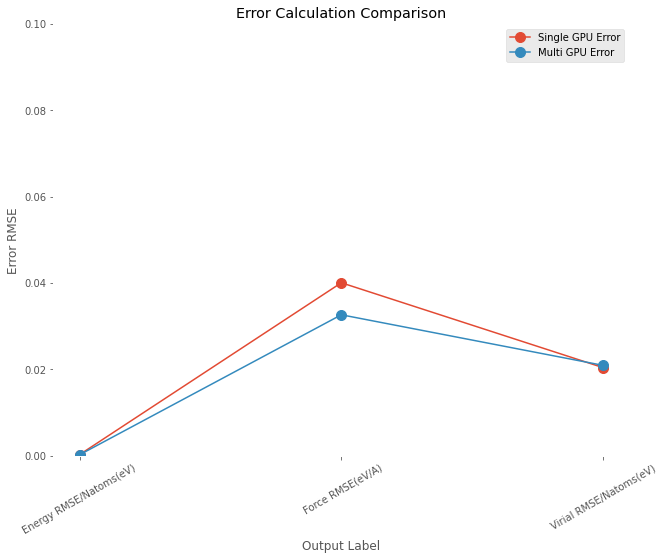

In [ ]:
#Error Calculation
#For ice_triple_II
## Dataset - 100 atoms
labels = ["Energy RMSE/Natoms(eV)"," Force RMSE(eV/A)","Virial RMSE/Natoms(eV)"]
single_gpu_error = [ 2.683585e-04, 4.006354e-02, 2.041031e-02]
multi_gpu_error = [ 2.366307e-04, 3.264902e-02,2.093865e-02]

#Creating Canvas
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Error RMSE')
ax.set_xlabel('Output Label')
ax.set_title('Error Calculation Comparison')

#Creating Multiline Plot
ax.plot(labels,single_gpu_error,marker='o',label="Single GPU Error",ms=10)
ax.plot(labels,multi_gpu_error,marker='o',label="Multi GPU Error",ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend( loc='upper right' )
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Training_Time_Graph/ice_triple_II_error_comp.svg',bbox_inches = 'tight')
plt.ylim(0,0.1)
plt.show()
plt.close()

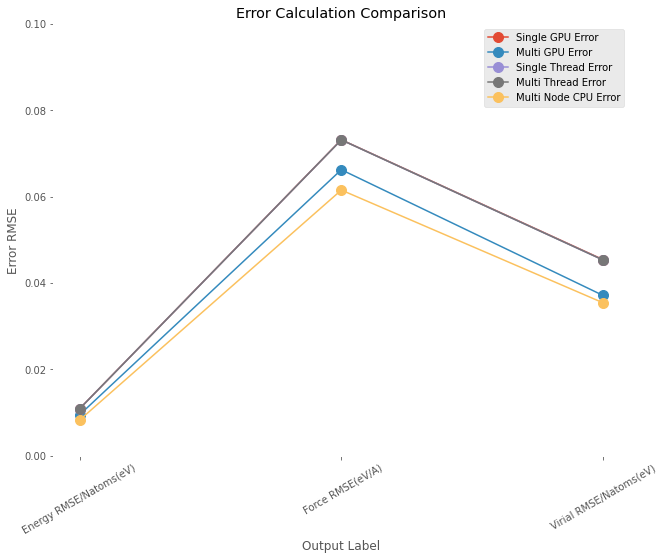

In [ ]:
#Error Calculation
#For AlCUMg 
labels = ["Energy RMSE/Natoms(eV)"," Force RMSE(eV/A)","Virial RMSE/Natoms(eV)"]
single_gpu_error = [ 1.088135e-02,7.317294e-02,4.541012e-02]
multi_gpu_error = [ 9.476970e-03, 6.623324e-02, 3.711308e-02]
single_thread_cpu_error = [ 1.087072e-02, 7.313950e-02, 4.532205e-02]
multi_thread_cpu_error = [  1.087072e-02, 7.313950e-02,4.532205e-02]
multi_node_cpu_error = [ 8.261601e-03, 6.151937e-02, 3.541427e-02]

#Creating Canvas
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Error RMSE')
ax.set_xlabel('Output Label')
ax.set_title('Error Calculation Comparison')

#Creating Multiline Plot
ax.plot(labels,single_gpu_error,marker='o',label="Single GPU Error",ms=10)
ax.plot(labels,multi_gpu_error,marker='o',label="Multi GPU Error",ms=10)
ax.plot(labels,single_thread_cpu_error,marker='o',label="Single Thread Error",ms=10)
ax.plot(labels,multi_thread_cpu_error,marker='o',label="Multi Thread Error",ms=10)
ax.plot(labels,multi_node_cpu_error,marker='o',label="Multi Node CPU Error",ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend( loc='upper right' )
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Training_Time_Graph/cu_error_comp.svg',bbox_inches = 'tight')
plt.ylim(0,0.1)
plt.show()
plt.close()

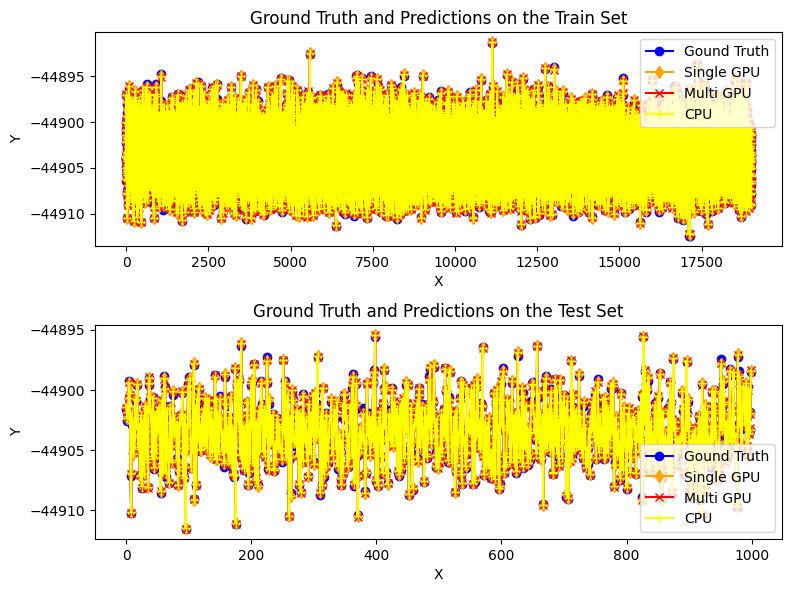

In [ ]:
#Model Deviation
ice_pimd_df = pd.read_csv(base_file_path + '/model_output_test_comparison.csv')
ice_pimd_df_train = pd.read_csv(base_file_path + '/model_output_train_comparison.csv')

plt.figure(figsize=(8,6),dpi=100)
plt.subplot(211)
plt.plot(range(len(ice_pimd_df_train)),ice_pimd_df_train[["ground_truth"]], c='blue', label='Gound Truth', marker='o')
plt.plot(range(len(ice_pimd_df_train)),ice_pimd_df_train[["single_gpu_prediction"]], c='orange', label='Single GPU', marker='d')
# plt.plot(range(len(ice_pimd_df_train)),ice_pimd_df_train[["multi_gpu_prediction"]], c='red', label='Multi GPU', marker='x')
plt.plot(range(len(ice_pimd_df_train)),ice_pimd_df_train[["cpu_prediction"]], c='yellow', label='CPU', marker='+')
plt.title('Ground Truth and Predictions on the Train Set')
# plt.scatter(train_data[["X_1"]], train_data[["Y"]], c='red', label='ground truth')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.subplot(212)
plt.title('Ground Truth and Predictions on the Test Set')
plt.plot(range(len(ice_pimd_df)),ice_pimd_df[["ground_truth"]], c='blue', label='Gound Truth', marker='o')
plt.plot(range(len(ice_pimd_df)),ice_pimd_df[["single_gpu_prediction"]], c='orange', label='Single GPU', marker='d')
# plt.plot(range(len(ice_pimd_df)),ice_pimd_df[["multi_gpu_prediction"]], c='red', label='Multi GPU', marker='x')
plt.plot(range(len(ice_pimd_df)),ice_pimd_df[["cpu_prediction"]], c='yellow', label='CPU', marker='+')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.tight_layout(pad=1.0)

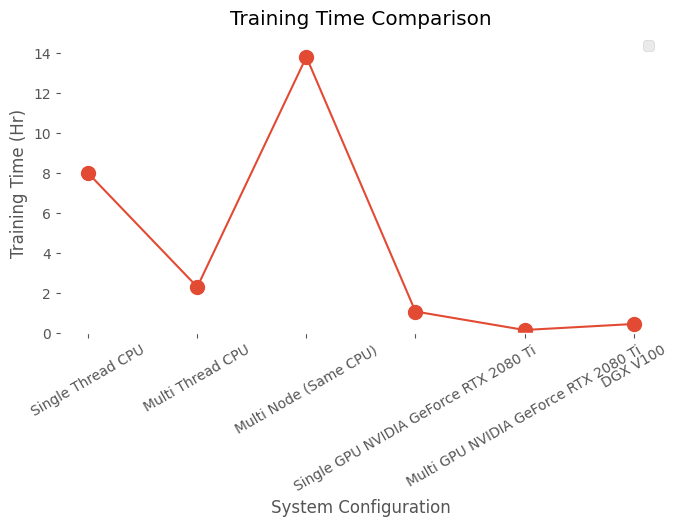

In [ ]:
#For AlCuMgcopper --  
training_time = [28792.222/3600,8319.153/3600,49722.081/3600,3895.316/3600,5698.160/36000,1650.949/3600]
label = ['Single Thread CPU','Multi Thread CPU','Multi Node (Same CPU)','Single GPU NVIDIA GeForce RTX 2080 Ti','Multi GPU NVIDIA GeForce RTX 2080 Ti','DGX V100']

#CPU - 2hr
#GPU - 1hr

#Creating Canvas
fig = plt.figure(figsize=(6,3),dpi=100)
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Training Time (Hr)')
ax.set_xlabel('System Configuration')
ax.set_title('Training Time Comparison')

#Creating Multiline Plot
ax.plot(label,training_time,marker='o',ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend()
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Training_Time_Graph/Copper_cpu_gpu_training_time_comp.svg',bbox_inches = 'tight')
plt.ylim(0,15)
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


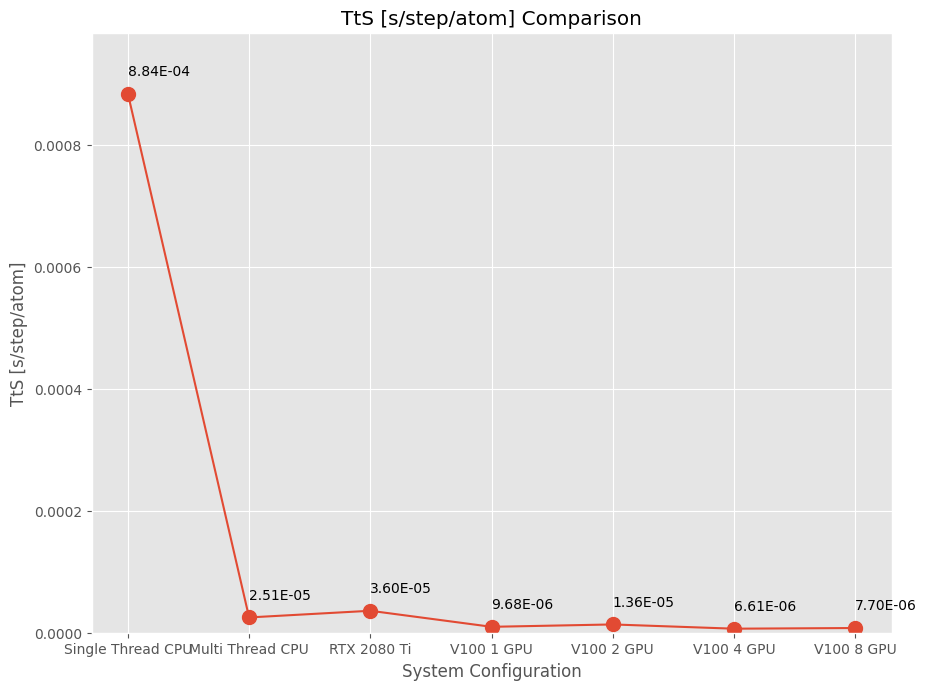

In [ ]:
#TtS [s/step/atom] Comparison
from decimal import Decimal
lammps_time = [44199/100000/500,1253/100000/500,1800/100000/500,484.2/100000/500,679.2/100000/500,330.6/100000/500,385.2/100000/500]
label = ['Single Thread CPU','Multi Thread CPU','RTX 2080 Ti','V100 1 GPU','V100 2 GPU','V100 4 GPU','V100 8 GPU']
speedup_lst = speedup_list(lammps_time)

#Creating Canvas
fig = plt.figure(figsize=(8,6),dpi=100)
plt.style.use('ggplot')
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0,0,1,1])

ax1.set_ylabel('TtS [s/step/atom]')
ax1.set_xlabel('System Configuration')
ax1.set_title('TtS [s/step/atom] Comparison')

#Creating Multiline Plot
ax1.plot(label,lammps_time,marker='o',ms=10)

for i,j in zip(label,lammps_time):
    ax1.annotate('%.2E' % Decimal(j),xy=(i,j + 0.00003))

ax.grid(False)
ax.set_facecolor('white')
ax.legend()
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Training_Time_Graph/Tts_comp.svg',bbox_inches = 'tight')
plt.ylim(0,0.00098398)
plt.show()
plt.close()

[1, 36, 25, 92, 66, 134, 115]


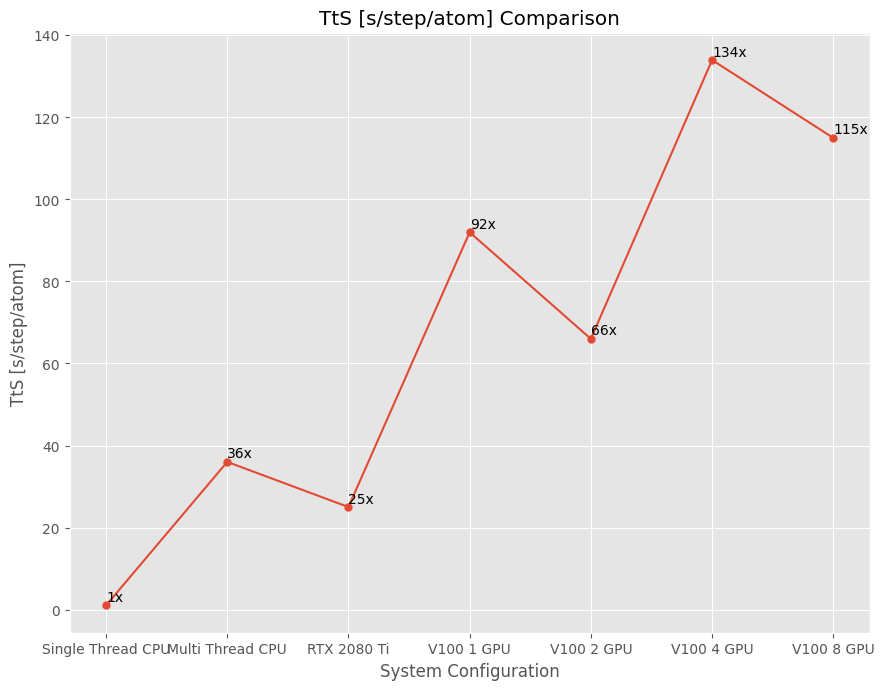

In [ ]:
#TtS [s/step/atom] Comparison
from decimal import Decimal
lammps_time = [44199/100000/500,1253/100000/500,1800/100000/500,484.2/100000/500,679.2/100000/500,330.6/100000/500,385.2/100000/500]
label = ['Single Thread CPU','Multi Thread CPU','RTX 2080 Ti','V100 1 GPU','V100 2 GPU','V100 4 GPU','V100 8 GPU']
speedup_lst = speedup_list(lammps_time)
print(speedup_lst)

#Creating Canvas
fig = plt.figure(figsize=(8,6),dpi=100)
plt.style.use('ggplot')
ax1 = fig.add_axes([0,0,1,1])

ax1.set_ylabel('TtS [s/step/atom]')
ax1.set_xlabel('System Configuration')
ax1.set_title('TtS [s/step/atom] Comparison')

#Creating Multiline Plot
ax1.plot(label,speedup_lst,marker='o',ms=5)

for i,j in zip(label,speedup_lst):
    ax1.annotate(str(j) + 'x',xy=(i,j+1))

ax.grid(False)
ax.set_facecolor('white')
ax.legend()
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Training_Time_Graph/Tts_comp.svg',bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
from decimal import Decimal
lammps_time = [44199/100000/500,1253/100000/500,484.2/100000/500,679.2/100000/500,330.6/100000/500,385.2/100000/500]
label = ['Single Thread CPU','Multi Thread CPU','V100 1 GPU','V100 2 GPU','V100 4 GPU','V100 8 GPU']
speedup_lst = speedup_list(lammps_time)

plt.figure(figsize=(8,6),dpi=100)
plt.subplot(211)
plt.plot(label,lammps_time,marker='o',ms=10)
plt.title('Ground Truth and Predictions on the Train Set')
# plt.scatter(train_data[["X_1"]], train_data[["Y"]], c='red', label='ground truth')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.subplot(212)
plt.title('Ground Truth and Predictions on the Test Set')
plt.plot(range(len(ice_pimd_df)),ice_pimd_df[["ground_truth"]], c='blue', label='Gound Truth', marker='o')
plt.plot(range(len(ice_pimd_df)),ice_pimd_df[["single_gpu_prediction"]], c='orange', label='Single GPU', marker='d')
plt.plot(range(len(ice_pimd_df)),ice_pimd_df[["multi_gpu_prediction"]], c='red', label='Multi GPU', marker='x')
plt.plot(range(len(ice_pimd_df)),ice_pimd_df[["cpu_prediction"]], c='yellow', label='CPU', marker='+')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.tight_layout(pad=1.0)

In [ ]:



lammps_time = [44199/100000/500,1253/100000/500,484.2/100000/500,679.2/100000/500,330.6/100000/500,385.2/100000/500]
print(speedup_list(lammps_time))

0.00088398 2.506e-05
0.00088398 9.683999999999999e-06
0.00088398 1.3584e-05
0.00088398 6.612e-06
0.00088398 7.704e-06
[1, 36, 92, 66, 134, 115]


## LAMMPS Simulation Analysis 

## Metric - ATOM-Timestep/s

In [ ]:
import math as m
def speed_up(base_val,curr_val):
    return m.ceil(base_val/curr_val)


print(speed_up(18955,61))

311


In [ ]:
import pandas as pd
from decimal import Decimal


## WATER
# Creating Dataframe
columns = ['Application','Metric','Intel(R) Xeon(R) Bronze 3204','1x TU102 GDDR6 11GB','2x TU102 GDDR6 11GB',
           '1x V100 SXM2 32GB','2x V100 SXM2 32GB','4x V100 SXM2 32GB','8x V100 SXM2 32GB']

df = pd.DataFrame(columns=columns)



data_atom_1k = ['LAMMPS_1k','ATOM-Timestep/s',1000*1.538,1000*45.943,1000*58.818,1000*235.724,1000*283.194,1000*263.639,1000*241.448]
data_wall_1k = ['LAMMPS_1k','Wall Time(s)',6502,222,175,48,43,49,62]
data_nrf_1k = ['LAMMPS_1k','NRF','1x','30x','38x','136x','152x','133x','105x']
data_atom_10k = ['LAMMPS_10k','ATOM-Timestep/s',10000*0.159,10000*6.339,10000*9.370,10000*35.889,10000*62.628,10000*109.100,10000*146.145]
data_wall_10k = ['LAMMPS_10k','Wall Time(s)',1470582,1583,1073,285,167,103,89]
data_nrf_10k = ['LAMMPS_10k','NRF','1x','929x','1371x','5160x','8806x','14278x','16524x']
data_atom_100k = ['LAMMPS_100k','ATOM-Timestep/s',100000*0.016,100000*0.642,100000*1.067,100000*3.293,100000*5.869,10000*10.587,10000*19.939]
data_wall_100k = ['LAMMPS_100k','Wall Time(s)',14862952,15575,9385,3046,1709,952,523]
data_nrf_100k = ['LAMMPS_100k','NRF','1x','955x','1584x','4880x','8697x','15613x','28419x']
data_atom_1000k = ['LAMMPS_1000k','ATOM-Timestep/s',0,0,0,0,0,1000000*0.806,1000000*1.552]
data_wall_1000k = ['LAMMPS_1000k','Wall Time(s)',0,0,0,0,0,12425,6471]
data_nrf_1000k = ['LAMMPS_1000k','NRF','1x','x','x','x','x','x','x']

data = [data_atom_1k,data_wall_1k,data_nrf_1k,data_atom_10k,data_wall_10k,data_nrf_10k,
        data_atom_100k,data_wall_100k,data_nrf_100k,data_atom_1000k,data_wall_1000k]

for idx_1 in range(len(data)):
    for idx_2 in range(len(data[idx_1])):
        if type(data[idx_1][idx_2]) == float:
            data[idx_1][idx_2] = f"{Decimal(data[idx_1][idx_2]):.2E}"
    df.loc[len(df)] = data[idx_1] 

In [ ]:
df

Application           Metric Intel(R) Xeon(R) Bronze 3204  \
0      LAMMPS_1k  ATOM-Timestep/s                      1.54E+3   
1      LAMMPS_1k     Wall Time(s)                         6502   
2      LAMMPS_1k              NRF                           1x   
3     LAMMPS_10k  ATOM-Timestep/s                      1.59E+3   
4     LAMMPS_10k     Wall Time(s)                      1470582   
5     LAMMPS_10k              NRF                           1x   
6    LAMMPS_100k  ATOM-Timestep/s                      1.60E+3   
7    LAMMPS_100k     Wall Time(s)                     14862952   
8    LAMMPS_100k              NRF                           1x   
9   LAMMPS_1000k  ATOM-Timestep/s                            0   
10  LAMMPS_1000k     Wall Time(s)                            0   

   1x TU102 GDDR6 11GB 2x TU102 GDDR6 11GB 1x V100 SXM2 32GB  \
0              4.59E+4             5.88E+4           2.36E+5   
1                  222                 175                48   
2                  30x                 38x              136x   
3              6.34E+4             9.37E+4           3.59E+5   
4                 1583                1073               285   
5                 929x               1371x             5160x   
6              6.42E+4             1.07E+5           3.29E+5   
7                15575                9385              3046   
8                 955x               1584x             4880x   
9                    0                   0                 0   
10                   0                   0                 0   

   2x V100 SXM2 32GB 4x V100 SXM2 32GB 8x V100 SXM2 32GB  
0            2.83E+5           2.64E+5           2.41E+5  
1                 43                49                62  
2               152x              133x              105x  
3            6.26E+5           1.09E+6           1.46E+6  
4                167               103                89  
5              8806x            14278x            16524x  
6            5.87E+5           1.06E+5           1.99E+5  
7               1709               952               523  
8              8697x            15613x            28419x  
9                  0           8.06E+5           1.55E+6  
10                 0             12425              6471

In [ ]:
df.columns[2:]

Index(['Intel(R) Xeon(R) Bronze 3204', '1x TU102 GDDR6 11GB',
       '2x TU102 GDDR6 11GB', '1x V100 SXM2 32GB', '2x V100 SXM2 32GB',
       '4x V100 SXM2 32GB', '8x V100 SXM2 32GB'],
      dtype='object')

In [ ]:
df.loc[(df['Application'] == 'LAMMPS_100k') & (df['Metric'] == 'ATOM-Timestep/s')].iloc[:,2:].astype(float).values.flatten().tolist()

[1600.0, 64200.0, 107000.0, 329000.0, 587000.0, 106000.0, 199000.0]

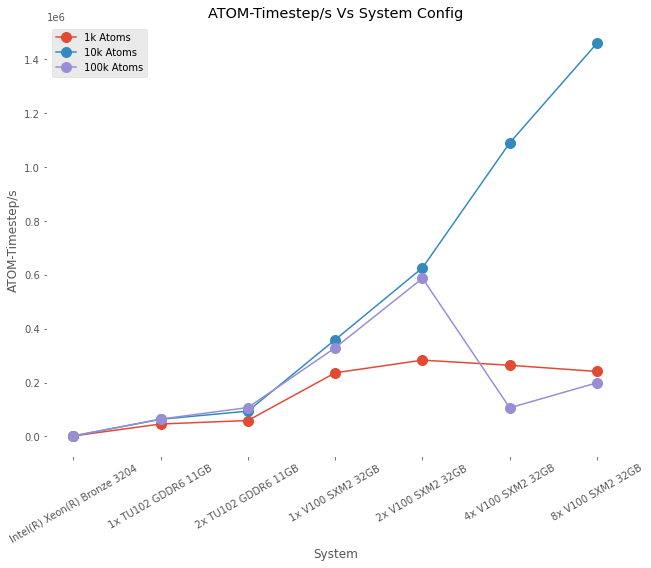

In [ ]:
#Creating Canvas
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('ATOM-Timestep/s')
ax.set_xlabel('System')
ax.set_title('ATOM-Timestep/s Vs System Config')

#Creating Multiline Plot
ax.plot(df.columns[2:],df.loc[(df['Application'] == 'LAMMPS_1k') & (df['Metric'] == 'ATOM-Timestep/s')].iloc[:,2:].astype(float).values.flatten().tolist(),marker='o',label="1k Atoms",ms=10)
ax.plot(df.columns[2:],df.loc[(df['Application'] == 'LAMMPS_10k') & (df['Metric'] == 'ATOM-Timestep/s')].iloc[:,2:].astype(float).values.flatten().tolist(),marker='o',label="10k Atoms",ms=10)
ax.plot(df.columns[2:],df.loc[(df['Application'] == 'LAMMPS_100k') & (df['Metric'] == 'ATOM-Timestep/s')].iloc[:,2:].astype(float).values.flatten().tolist(),marker='o',label="100k Atoms",ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend( loc='upper left' )
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'ATOM-Timestep_s.svg',bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
## Copper
# Creating Dataframe
columns = ['Application','Metric','Intel(R) Xeon(R) Bronze 3204','1x TU102 GDDR6 11GB','2x TU102 GDDR6 11GB',
           '1x V100 SXM2 32GB','2x V100 SXM2 32GB','4x V100 SXM2 32GB','8x V100 SXM2 32GB']

df = pd.DataFrame(columns=columns)
2181,107,30
18955,881,141
111487,7270,1047
data_atom_1k = ['LAMMPS_1k','ATOM-Timestep/s',1000*4.586,1000*95.675,1000*103.585,1000*423.793,1000*527.812,1000*531.006,1000*463.349]
data_wall_1k = ['LAMMPS_1k','Wall Time(s)',2181,107,99,30,26,29,41]
data_nrf_1k = ['LAMMPS_1k','NRF','1x','21x','23x','73x','84x','76x','54x']

data_atom_10k = ['LAMMPS_10k','ATOM-Timestep/s',10000*0.528,10000*11.388,10000*13.156,10000*73.849,10000*62.628,10000*109.100,10000*146.145]
data_wall_10k = ['LAMMPS_10k','Wall Time(s)',18955,881,763,141,88,69,61]
data_nrf_10k = ['LAMMPS_10k','NRF','1x','22x','25x','135x','216x','275x','311x']

data_atom_100k = ['LAMMPS_100k','ATOM-Timestep/s',100000*0.90,100000*11.388,100000*13.156,100000*9.581,100000*18.456,100000*35.397,100000*63.531]
data_wall_100k = ['LAMMPS_100k','Wall Time(s)',111487,7270,4240,1047,544,289,177]
data_nrf_100k = ['LAMMPS_100k','NRF','1x','127x','147x','107x','205x','386x','630x']

data_atom_1000k = ['LAMMPS_1000k','ATOM-Timestep/s','NA','NA','NA','NA','NA',1000000*2.717,1000000*5.343]
data_wall_1000k = ['LAMMPS_1000k','Wall Time(s)','NA','NA','NA','NA',3688,1892]

data = [data_atom_1k,data_wall_1k,data_nrf_1k,data_atom_10k,data_wall_10k,data_nrf_10k,
        data_atom_100k,data_wall_100k,data_nrf_100k,data_atom_1000k,data_wall_1000k]

for idx_1 in range(len(data)):
    for idx_2 in range(len(data[idx_1])):
        if type(data[idx_1][idx_2]) == float:
            data[idx_1][idx_2] = f"{Decimal(data[idx_1][idx_2]):.2E}"
    df.loc[len(df)] = data[idx_1] 

In [ ]:
df

Application           Metric Intel(R) Xeon(R) Bronze 3204  \
0      LAMMPS_1k  ATOM-Timestep/s                      4.59E+3   
1      LAMMPS_1k     Wall Time(s)                         2181   
2      LAMMPS_1k              NRF                           1x   
3     LAMMPS_10k  ATOM-Timestep/s                      5.28E+3   
4     LAMMPS_10k     Wall Time(s)                        18955   
5     LAMMPS_10k              NRF                           1x   
6    LAMMPS_100k  ATOM-Timestep/s                      9.00E+4   
7    LAMMPS_100k     Wall Time(s)                       111487   
8    LAMMPS_100k              NRF                           1x   
9   LAMMPS_1000k  ATOM-Timestep/s                           NA   
10  LAMMPS_1000k     Wall Time(s)                           NA   

   1x TU102 GDDR6 11GB 2x TU102 GDDR6 11GB 1x V100 SXM2 32GB  \
0              9.57E+4             1.04E+5           4.24E+5   
1                  107                  99                30   
2                  21x                 23x               73x   
3              1.14E+5             1.32E+5           7.38E+5   
4                  881                 763               141   
5                  22x                 25x              135x   
6              1.14E+6             1.32E+6           9.58E+5   
7                  881                 763              1047   
8                 127x                147x              107x   
9                   NA                  NA                NA   
10                  NA                  NA                NA   

   2x V100 SXM2 32GB 4x V100 SXM2 32GB 8x V100 SXM2 32GB  
0            5.28E+5           5.31E+5           4.63E+5  
1                 26                29                41  
2                84x               76x               54x  
3            6.26E+5           1.09E+6           1.46E+6  
4                 88                69                61  
5               216x              275x              311x  
6            1.85E+6           3.54E+6           6.35E+6  
7                544               289               177  
8               205x              386x              630x  
9            1.47E+6           2.72E+6           5.34E+6  
10              6824              3688              1892

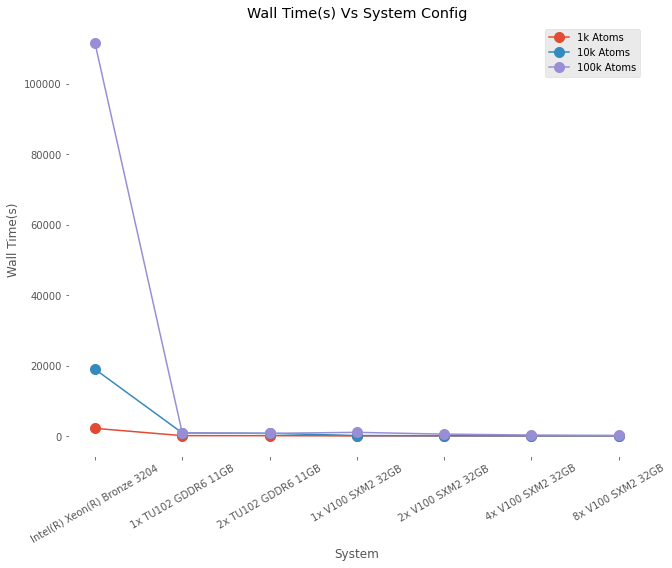

In [ ]:
#Creating Canvas
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Wall Time(s)')
ax.set_xlabel('System')
ax.set_title('Wall Time(s) Vs System Config')

#Creating Multiline Plot
ax.plot(df.columns[2:],df.loc[(df['Application'] == 'LAMMPS_1k') & (df['Metric'] == 'Wall Time(s)')].iloc[:,2:].astype(float).values.flatten().tolist(),marker='o',label="1k Atoms",ms=10)
ax.plot(df.columns[2:],df.loc[(df['Application'] == 'LAMMPS_10k') & (df['Metric'] == 'Wall Time(s)')].iloc[:,2:].astype(float).values.flatten().tolist(),marker='o',label="10k Atoms",ms=10)
ax.plot(df.columns[2:],df.loc[(df['Application'] == 'LAMMPS_100k') & (df['Metric'] == 'Wall Time(s)')].iloc[:,2:].astype(float).values.flatten().tolist(),marker='o',label="100k Atoms",ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend( loc='upper right' )
ax.tick_params(axis='x', rotation=30)
plt.savefig(base_file_path + 'Wall-Time(s).svg',bbox_inches = 'tight')
plt.show()
plt.close()

TtS(μs/atom/GPU/step)

In [ ]:
from decimal import Decimal

def get_timestep(wall_time,atom,gpu,step):
    wall_time_micro_sec = wall_time*(10^6)
    result = wall_time_micro_sec/atom/gpu/step
    return '%.2E' % Decimal(result) 

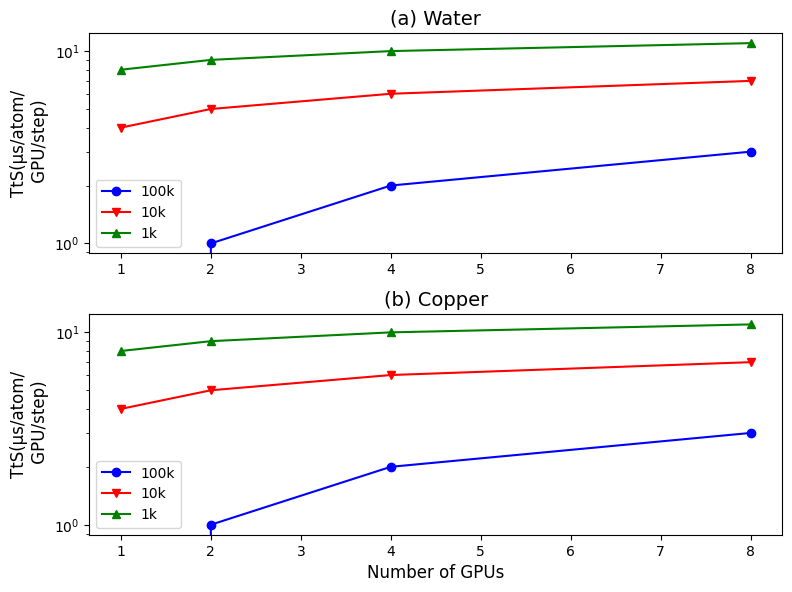

In [ ]:
#Data
lammps_1k_water_v100 = [(48,1000,1,10000),(43,1000,2,10000),(49,1000,4,10000),(62,1000,8,10000)]
lammps_1k_water_v100_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_1k_water_v100]
lammps_10k_water_v100 = [(285,10000,1,10000),(167,10000,2,10000),(103,10000,4,10000),(89,10000,8,10000)]
lammps_10k_water_v100_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_10k_water_v100]
lammps_100k_water_v100 = [(3046,100000,1,10000),(1709,100000,2,10000),(952,100000,4,10000),(523,100000,8,10000)]
lammps_100k_water_v100_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_100k_water_v100]

lammps_1k_copper_v100 = [(30,1000,1,10000),(26,1000,2,10000),(29,1000,4,10000),(41,1000,8,10000)]
lammps_1k_copper_v100_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_1k_copper_v100]
lammps_10k_copper_v100 = [(141,10000,1,10000),(88,10000,2,10000),(69,10000,4,10000),(61,10000,8,10000)]
lammps_10k_copper_v100_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_10k_copper_v100]
lammps_100k_copper_v100 = [(1047,100000,1,10000),(544,100000,2,10000),(289,100000,4,10000),(177,100000,8,10000)]
lammps_100k_copper_v100_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_100k_copper_v100]

#V100 GPU
fig = plt.figure(figsize=(8,6),dpi=100)
ax_1 = fig.add_subplot(211)
def y_fmt(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')
ax_1.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax_1.plot([1,2,4,8],lammps_100k_water_v100_result, c='blue', label='100k', marker='o')
ax_1.plot([1,2,4,8],lammps_10k_water_v100_result, c='red', label='10k', marker='v')
ax_1.plot([1,2,4,8],lammps_1k_water_v100_result, c='green', label='1k', marker='^')
ax_1.set_title('(a) Water',fontsize=14)
ax_1.set_ylabel('TtS(μs/atom/\n GPU/step)',fontsize=12)
ax_1.set_yscale('log')
ax_1.legend()

ax_2 = fig.add_subplot(212)
ax_2.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax_2.plot([1,2,4,8],lammps_100k_copper_v100_result, c='blue', label='100k', marker='o')
ax_2.plot([1,2,4,8],lammps_10k_copper_v100_result, c='red', label='10k', marker='v')
ax_2.plot([1,2,4,8],lammps_1k_copper_v100_result, c='green', label='1k', marker='^')
ax_2.set_title('(b) Copper',fontsize=14)
ax_2.set_xlabel('Number of GPUs',fontsize=12)
ax_2.set_ylabel('TtS(μs/atom/\n GPU/step)',fontsize=12)
ax_2.set_yscale('log')
ax_2.legend()
plt.tight_layout(pad=1.0)
plt.savefig(base_file_path + 'gpu_timestep_v100.png',bbox_inches = 'tight')

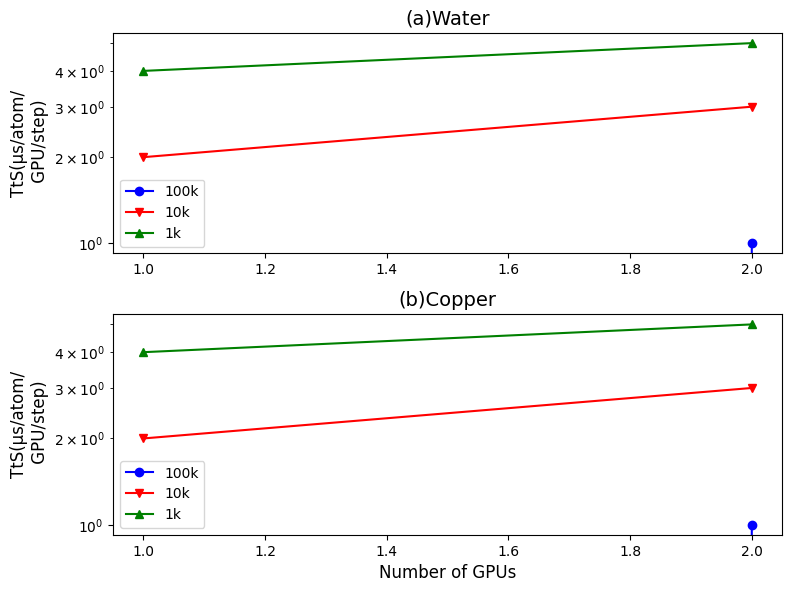

In [ ]:
lammps_1k_water_ti = [(222,1000,1,10000),(175,1000,2,10000)]
lammps_1k_water_ti_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_1k_water_ti]
lammps_10k_water_ti = [(1583,10000,1,10000),(1073,10000,2,10000)]
lammps_10k_water_ti_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_10k_water_ti]
lammps_100k_water_ti = [(15575,100000,1,10000),(9385,100000,2,10000)]
lammps_100k_water_ti_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_100k_water_ti]

lammps_1k_copper_ti = [(107,1000,1,10000),(99,1000,2,10000)]
lammps_1k_copper_ti_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_1k_copper_ti]
lammps_10k_copper_ti = [(881,10000,1,10000),(763,10000,2,10000)]
lammps_10k_copper_ti_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_10k_copper_ti]
lammps_100k_copper_ti = [(7270,100000,1,10000),(4240,100000,2,10000)]
lammps_100k_copper_ti_result = [get_timestep(elem[0],elem[1],elem[2],elem[3]) for elem in lammps_100k_copper_ti]

#Ti GPU
fig = plt.figure(figsize=(8,6),dpi=100)
ax_1 = fig.add_subplot(211)
def y_fmt(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')
ax_1.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax_1.plot([1,2],lammps_100k_water_ti_result, c='blue', label='100k', marker='o')
ax_1.plot([1,2],lammps_10k_water_ti_result, c='red', label='10k', marker='v')
ax_1.plot([1,2],lammps_1k_water_ti_result, c='green', label='1k', marker='^')
ax_1.set_title('(a)Water',fontsize=14)
ax_1.set_ylabel('TtS(μs/atom/\n GPU/step)',fontsize=12)
ax_1.set_yscale('log')
ax_1.legend()

ax_2 = fig.add_subplot(212)
ax_2.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax_2.plot([1,2],lammps_100k_copper_ti_result, c='blue', label='100k', marker='o')
ax_2.plot([1,2],lammps_10k_copper_ti_result, c='red', label='10k', marker='v')
ax_2.plot([1,2],lammps_1k_copper_ti_result, c='green', label='1k', marker='^')
ax_2.set_title('(b)Copper',fontsize=14)
ax_2.set_xlabel('Number of GPUs',fontsize=12)
ax_2.set_ylabel('TtS(μs/atom/\n GPU/step)',fontsize=12)
ax_2.set_yscale('log')
ax_2.legend()
plt.tight_layout(pad=1.0)
plt.savefig(base_file_path + 'gpu_timestep_ti.png',bbox_inches = 'tight')

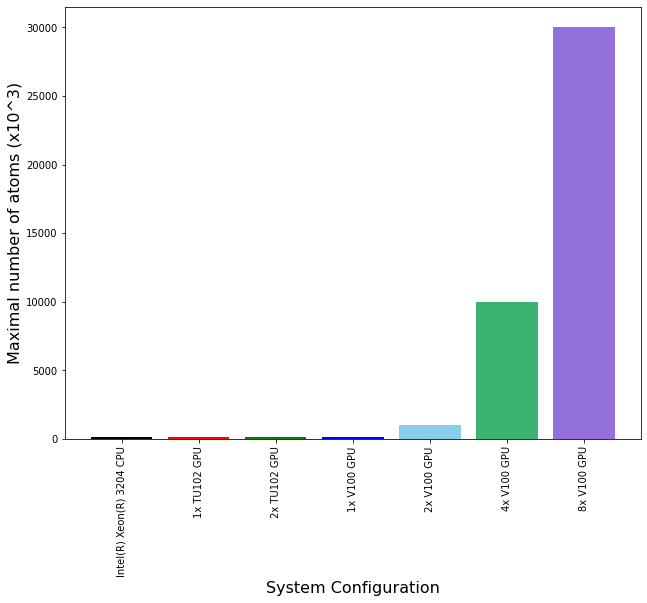

In [ ]:
x_label = ['Intel(R) Xeon(R) 3204 CPU','1x TU102 GPU','2x TU102 GPU','1x V100 GPU','2x V100 GPU','4x V100 GPU','8x V100 GPU']
y_val = [100,100,100,100,1000,10000,30000]

fig = plt.figure(figsize=(8,6))
# plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Maximal number of atoms (x10^3)',fontsize=16)
ax.set_xlabel('System Configuration',fontsize=16)
# ax.set_title('Wall Time(s) Vs System Config')
#Creating Multiline Plot
ax.bar(x_label,y_val,color=['black', 'red', 'green', 'blue', 'skyblue','mediumseagreen','mediumpurple'])
ax.grid(False)
ax.set_facecolor('white')
ax.tick_params(axis='x', rotation=90)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#Creating Multiline Plot
plt.savefig(base_file_path + 'maximal_no_of_atoms',bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
from decimal import Decimal

def get_timestep(wall_time,atom,step):
    wall_time_micro_sec = wall_time*(10^6)
    result = wall_time_micro_sec/atom/step
    return '%.2E' % Decimal(result) 

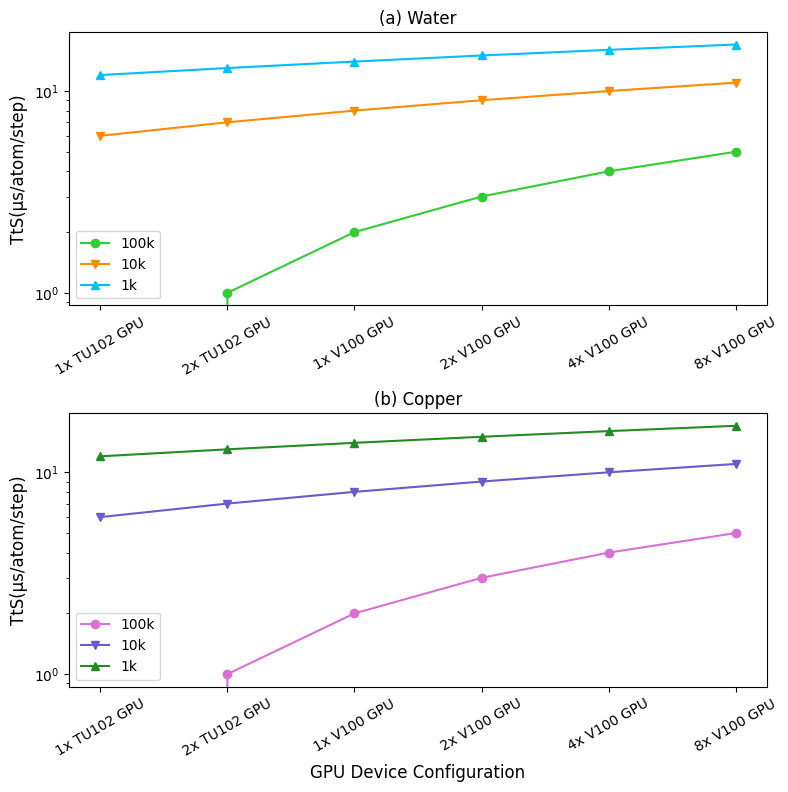

In [ ]:
#Data
x_label = ['1x TU102 GPU','2x TU102 GPU','1x V100 GPU','2x V100 GPU','4x V100 GPU','8x V100 GPU']

lammps_1k_water = [(222,1000,10000),(175,1000,10000),(48,1000,10000),(43,1000,10000),(49,1000,10000),(62,1000,10000)]
lammps_1k_water_result = [get_timestep(elem[0],elem[1],elem[2]) for elem in lammps_1k_water]
lammps_10k_water = [(1583,10000,10000),(1073,10000,10000),(285,10000,10000),(167,10000,10000),(103,10000,10000),(89,10000,10000)]
lammps_10k_water_result = [get_timestep(elem[0],elem[1],elem[2]) for elem in lammps_10k_water]
lammps_100k_water = [(15575,100000,10000),(9385,100000,10000),(3046,100000,10000),(1709,100000,10000),(952,100000,10000),(523,100000,10000)]
lammps_100k_water_result = [get_timestep(elem[0],elem[1],elem[2]) for elem in lammps_100k_water]

lammps_1k_copper = [(107,1000,10000),(99,1000,10000),(30,1000,10000),(26,1000,10000),(29,1000,10000),(41,1000,10000)]
lammps_1k_copper_result = [get_timestep(elem[0],elem[1],elem[2]) for elem in lammps_1k_copper]
lammps_10k_copper = [(881,1000,10000),(763,1000,10000),(141,10000,10000),(88,10000,10000),(69,10000,10000),(61,10000,10000)]
lammps_10k_copper_result = [get_timestep(elem[0],elem[1],elem[2]) for elem in lammps_10k_copper]
lammps_100k_copper = [(7270,1000,10000),(4240,1000,10000),(1047,100000,10000),(544,100000,10000),(289,100000,10000),(177,100000,10000)]
lammps_100k_copper_result = [get_timestep(elem[0],elem[1],elem[2]) for elem in lammps_100k_copper]

#V100 GPU
fig = plt.figure(figsize=(8,8),dpi=100)
ax_1 = fig.add_subplot(211)
def y_fmt(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')
ax_1.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax_1.plot(x_label,lammps_100k_water_result, c='limegreen', label='100k', marker='o')
ax_1.plot(x_label,lammps_10k_water_result, c='darkorange', label='10k', marker='v')
ax_1.plot(x_label,lammps_1k_water_result, c='deepskyblue', label='1k', marker='^')
ax_1.set_title('(a) Water',fontsize=12)
ax_1.tick_params(axis='x', rotation=30)
ax_1.set_ylabel('TtS(μs/atom/step)',fontsize=12)
ax_1.set_yscale('log')
ax_1.legend(loc='lower left')

ax_2 = fig.add_subplot(212)
ax_2.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax_2.plot(x_label,lammps_100k_copper_result, c='orchid', label='100k', marker='o')
ax_2.plot(x_label,lammps_10k_copper_result, c='slateblue', label='10k', marker='v')
ax_2.plot(x_label,lammps_1k_copper_result, c='forestgreen', label='1k', marker='^')
ax_2.set_title('(b) Copper',fontsize=12)
ax_2.set_xlabel('GPU Device Configuration',fontsize=12)
ax_2.tick_params(axis='x', rotation=30)
ax_2.set_ylabel('TtS(μs/atom/step)',fontsize=12)
ax_2.set_yscale('log')
ax_2.legend(loc='lower left')
plt.tight_layout(pad=1.0)
plt.savefig(base_file_path + 'gpu_timestep_simple.png',bbox_inches = 'tight')

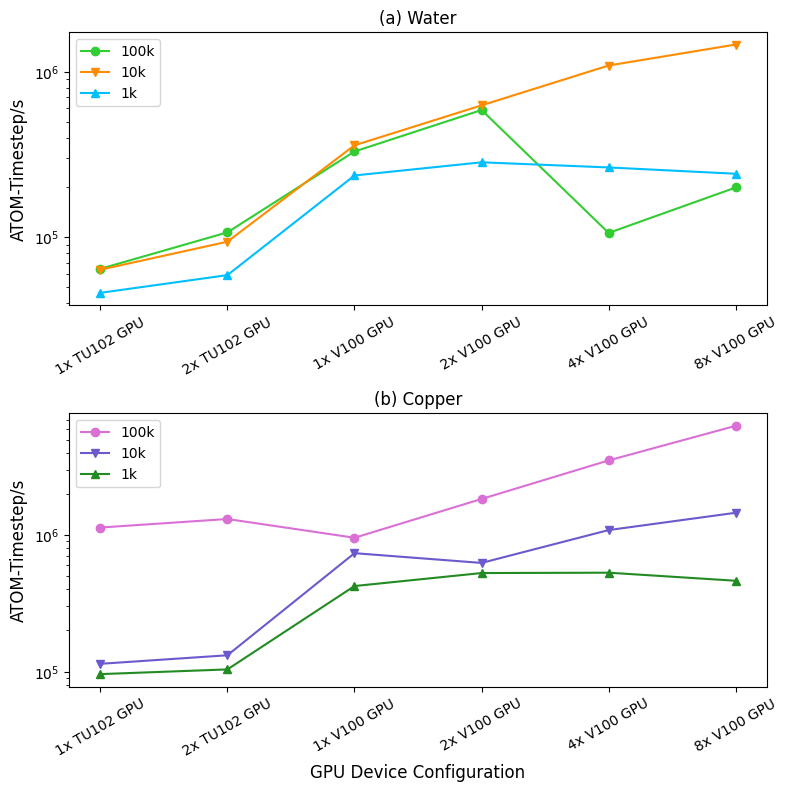

In [ ]:
#Data
x_label = ['1x TU102 GPU','2x TU102 GPU','1x V100 GPU','2x V100 GPU','4x V100 GPU','8x V100 GPU']
lammps_1k_water_result = [1000*45.943,1000*58.818,1000*235.724,1000*283.194,1000*263.639,1000*241.448]
lammps_10k_water_result = [10000*6.339,10000*9.370,10000*35.889,10000*62.628,10000*109.100,10000*146.145]
lammps_100k_water_result = [100000*0.642,100000*1.067,100000*3.293,100000*5.869,10000*10.587,10000*19.939]

lammps_1k_copper_result = [1000*95.675,1000*103.585,1000*423.793,1000*527.812,1000*531.006,1000*463.349]
lammps_10k_copper_result = [10000*11.388,10000*13.156,10000*73.849,10000*62.628,10000*109.100,10000*146.145]
lammps_100k_copper_result = [100000*11.388,100000*13.156,100000*9.581,100000*18.456,100000*35.397,100000*63.531]

fig = plt.figure(figsize=(8,8),dpi=100)
ax_1 = fig.add_subplot(211)
def y_fmt(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')

ax_1.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax_1.plot(x_label,lammps_100k_water_result, c='limegreen', label='100k', marker='o')
ax_1.plot(x_label,lammps_10k_water_result, c='darkorange', label='10k', marker='v')
ax_1.plot(x_label,lammps_1k_water_result, c='deepskyblue', label='1k', marker='^')
ax_1.set_title('(a) Water',fontsize=12)
ax_1.tick_params(axis='x', rotation=30)
ax_1.set_ylabel('ATOM-Timestep/s',fontsize=12)
ax_1.legend(loc='upper left')
ax_1.set_yscale('log')

ax_2 = fig.add_subplot(212)
ax_2.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax_2.plot(x_label,lammps_100k_copper_result, c='orchid', label='100k', marker='o')
ax_2.plot(x_label,lammps_10k_copper_result, c='slateblue', label='10k', marker='v')
ax_2.plot(x_label,lammps_1k_copper_result, c='forestgreen', label='1k', marker='^')
ax_2.set_title('(b) Copper',fontsize=12)
ax_2.set_xlabel('GPU Device Configuration',fontsize=12)
ax_2.tick_params(axis='x', rotation=30)
ax_2.set_ylabel('ATOM-Timestep/s',fontsize=12)
ax_2.legend(loc='upper left')
ax_2.set_yscale('log')
plt.tight_layout(pad=1.0)
plt.savefig(base_file_path + 'gpu_atom-timestep_simple.png',bbox_inches = 'tight')

In [ ]:
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'mag...

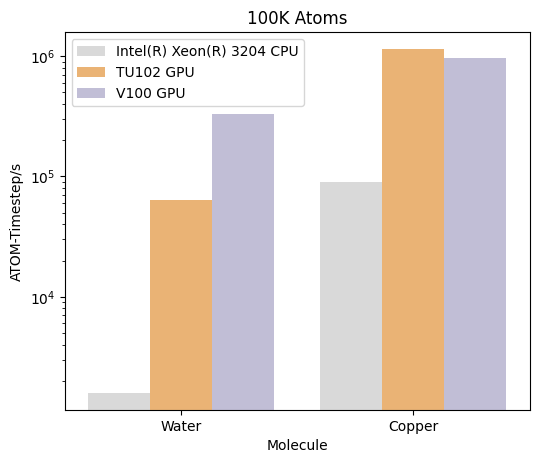

In [ ]:
df = pd.DataFrame({
    'GPU Device Configuration':['Intel(R) Xeon(R) 3204 CPU','TU102 GPU','V100 GPU','Intel(R) Xeon(R) 3204 CPU','TU102 GPU','V100 GPU'],
    'lammps_1k_result': [1000*1.538,1000*45.943,1000*235.724,1000*4.586,1000*95.675,1000*423.793],
    'lammps_10k_result' : [10000*0.159,10000*6.339,10000*35.889,10000*0.528,10000*11.388,10000*73.849],
    'lammps_100k_result' : [100000*0.016,100000*0.642,100000*3.293,100000*0.90,100000*11.388,100000*9.581],
    'system':['Water','Water','Water','Copper','Copper','Copper']
})

def y_fmt(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')

plt.figure(figsize=(6,5),dpi=100)
ax = sns.barplot(data=df, x="system", y="lammps_100k_result", hue="GPU Device Configuration", palette="Set3_r")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax.set(xlabel='Molecule', ylabel='ATOM-Timestep/s',title='100K Atoms')
ax.set_yscale('log')
ax.legend(loc="upper left")
plt.savefig(base_file_path + '100k_atom-timestep_comp.png',bbox_inches = 'tight')

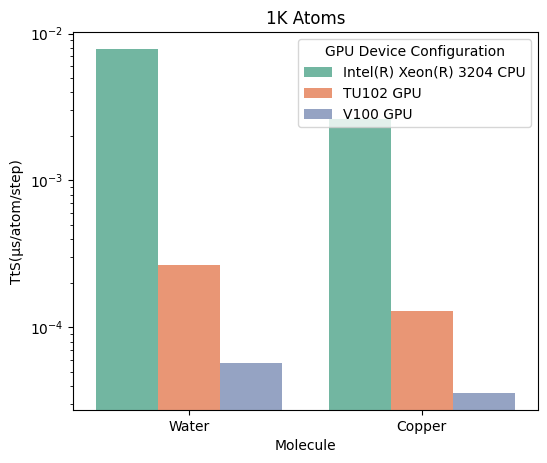

In [ ]:
from decimal import Decimal

def get_timestep(wall_time,atom,step):
    wall_time_micro_sec = wall_time*(10^6)
    result = wall_time_micro_sec/atom/step
    return result


lammps_1k = [(6502,1000,10000),(222,1000,10000),(48,1000,10000),(2181,1000,10000),(107,1000,10000),(30,1000,10000)]
lammps_10k = [(1470582,10000,10000),(1583,10000,10000),(285,10000,10000),(18955,10000,10000),(881,10000,10000),(141,10000,10000)]
lammps_100k = [(14862952,100000,10000),(15575,100000,10000),(3046,100000,10000),(111487,100000,10000),(7270,100000,10000),(1047,100000,10000)]

lammps_1k_result = [get_timestep(elem[0],elem[1],elem[2]) for elem in lammps_1k]
lammps_10k_result = [get_timestep(elem[0],elem[1],elem[2]) for elem in lammps_10k]
lammps_100k_result = [get_timestep(elem[0],elem[1],elem[2]) for elem in lammps_100k]

df = pd.DataFrame({
    'GPU Device Configuration':['Intel(R) Xeon(R) 3204 CPU','TU102 GPU','V100 GPU','Intel(R) Xeon(R) 3204 CPU','TU102 GPU','V100 GPU'],
    'lammps_1k_result': lammps_1k_result,
    'lammps_10k_result' : lammps_10k_result, 
    'lammps_100k_result' : lammps_100k_result,
    'system':['Water','Water','Water','Copper','Copper','Copper']
})

def y_fmt(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')

plt.figure(figsize=(6,5),dpi=100)
ax = sns.barplot(data=df, x='system', y='lammps_1k_result', hue='GPU Device Configuration', palette="Set2")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax.set(xlabel='Molecule', ylabel='TtS(μs/atom/step)',title='1K Atoms')
ax.set_yscale('log')
plt.savefig(base_file_path + '1k_timestep_comp.png',bbox_inches = 'tight')

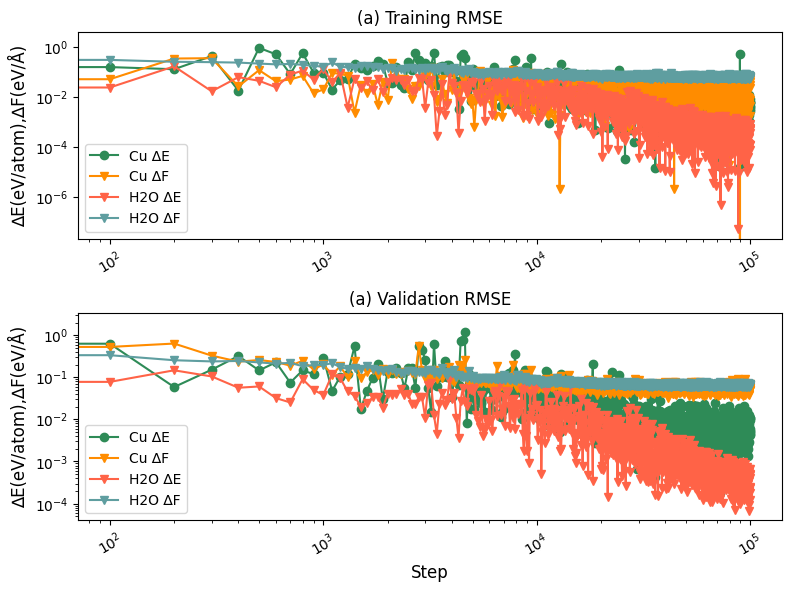

In [ ]:
copper_data = np.genfromtxt(base_file_path+ "copper_lcurve.out", names=True)
water_data = np.genfromtxt(base_file_path+ "water_lcurve.out", names=True)


fig = plt.figure(figsize=(8,6),dpi=100)
ax_1 = fig.add_subplot(211)
def y_fmt(x, y):
    return '{:.2e}'.format(x).replace('e', 'x10^')
ax_1.plot(copper_data['step'],copper_data['rmse_e_trn'], c='seagreen', label='Cu ∆E', marker='o')
ax_1.plot(copper_data['step'],copper_data['rmse_f_trn'], c='darkorange', label='Cu ∆F', marker='v')
ax_1.plot(water_data['step'],water_data['rmse_e_trn'], c='tomato', label='H2O ∆E', marker='v')
ax_1.plot(water_data['step'],water_data['rmse_f_trn'], c='cadetblue', label='H2O ∆F', marker='v')
ax_1.set_title('(a) Training RMSE',fontsize=12)
ax_1.tick_params(axis='x', rotation=30)
ax_1.set_ylabel('∆E(eV/atom),∆F(eV/Å)',fontsize=12)
ax_1.set_yscale('log')
ax_1.set_xscale('log')
ax_1.legend()


ax_2 = fig.add_subplot(212)
ax_2.plot(copper_data['step'],copper_data['rmse_e_val'], c='seagreen', label='Cu ∆E', marker='o')
ax_2.plot(copper_data['step'],copper_data['rmse_f_val'], c='darkorange', label='Cu ∆F', marker='v')
ax_2.plot(water_data['step'],water_data['rmse_e_val'], c='tomato', label='H2O ∆E', marker='v')
ax_2.plot(water_data['step'],water_data['rmse_f_val'], c='cadetblue', label='H2O ∆F', marker='v')
ax_2.set_title('(a) Validation RMSE',fontsize=12)
ax_2.tick_params(axis='x', rotation=30)
ax_2.set_ylabel('∆E(eV/atom),∆F(eV/Å)',fontsize=12)
ax_2.set_xlabel('Step',fontsize=12)
ax_2.set_yscale('log')
ax_2.set_xscale('log')
ax_2.legend()
plt.tight_layout(pad=1.0)
plt.savefig(base_file_path + 'gpu_model_training.png',bbox_inches = 'tight')


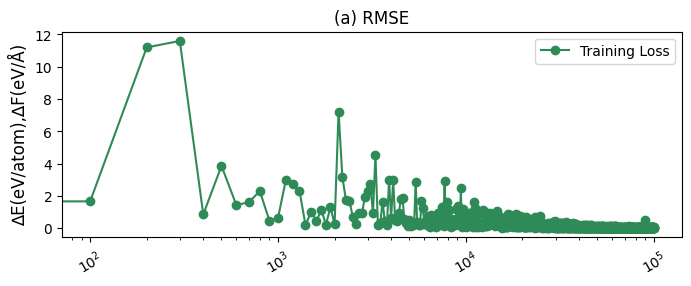

In [ ]:
copper_data = np.genfromtxt(base_file_path+ "copper_lcurve.out", names=True)
water_data = np.genfromtxt(base_file_path+ "water_lcurve.out", names=True)


fig = plt.figure(figsize=(8,6),dpi=100)
ax_1 = fig.add_subplot(211)
def y_fmt(x, y):
    return '{:.2e}'.format(x).replace('e', 'x10^')
ax_1.plot(copper_data['step'],copper_data['rmse_trn'], c='seagreen', label='Training Loss', marker='o')
ax_1.set_title('(a) RMSE',fontsize=12)
ax_1.tick_params(axis='x', rotation=30)
ax_1.set_ylabel('∆E(eV/atom),∆F(eV/Å)',fontsize=12)
ax_2.set_xlabel('Step',fontsize=12)
# ax_1.set_yscale('log')
ax_1.set_xscale('log')
ax_1.legend()


# ax_2 = fig.add_subplot(212)
# ax_2.plot(copper_data['step'],copper_data['rmse_e_val'], c='seagreen', label='Cu ∆E', marker='o')
# ax_2.plot(copper_data['step'],copper_data['rmse_f_val'], c='darkorange', label='Cu ∆F', marker='v')
# ax_2.plot(water_data['step'],water_data['rmse_e_val'], c='tomato', label='H2O ∆E', marker='v')
# ax_2.plot(water_data['step'],water_data['rmse_f_val'], c='cadetblue', label='H2O ∆F', marker='v')
# ax_2.set_title('(a) Validation RMSE',fontsize=12)
# ax_2.tick_params(axis='x', rotation=30)
# ax_2.set_ylabel('∆E(eV/atom),∆F(eV/Å)',fontsize=12)
# ax_2.set_xlabel('Step',fontsize=12)
# ax_2.set_yscale('log')
# ax_2.set_xscale('log')
# ax_2.legend()

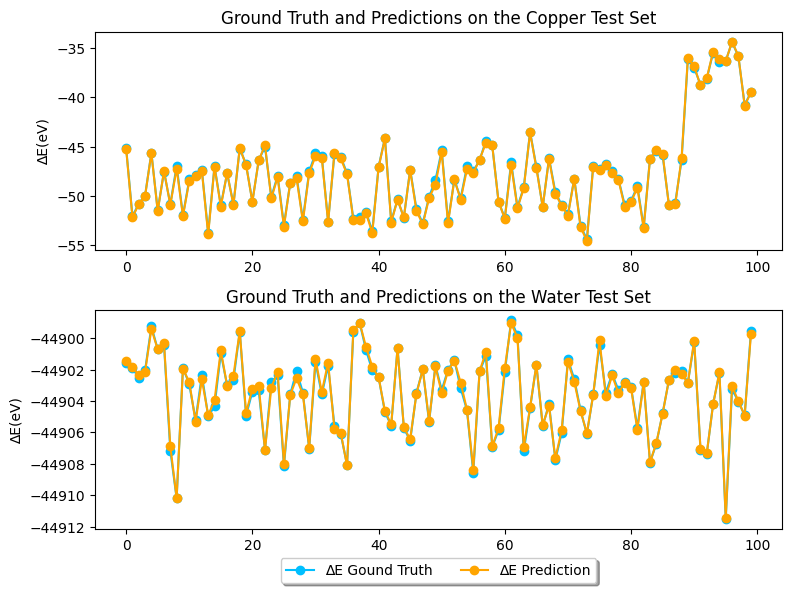

In [36]:
copper_energy_pred = np.genfromtxt(base_file_path+ "loss.e.out")
copper_force_pred = np.genfromtxt(base_file_path+ "loss.f.out")


ice_energy_pred = np.genfromtxt(base_file_path+ "ice_loss.e.out")
ice_force_pred = np.genfromtxt(base_file_path+ "ice_loss.f.out")

data = []
for idx in range(ice_energy_pred.shape[0]):
    data.append([copper_energy_pred[idx][0],copper_energy_pred[idx][1],copper_force_pred[idx][0],copper_force_pred[idx][1]])
copper_df_test = pd.DataFrame(columns=['energy_ground_truth','energy_predicted','force_ground_truth','force_predicted'],data=data)


data = []
for idx in range(ice_energy_pred.shape[0]):
    data.append([ice_energy_pred[idx][0],ice_energy_pred[idx][1],ice_force_pred[idx][0],ice_force_pred[idx][1]])
ice_df_test = pd.DataFrame(columns=['energy_ground_truth','energy_predicted','force_ground_truth','force_predicted'],data=data)

plt.figure(figsize=(8,6),dpi=100)
plt.subplot(211)
plt.plot(range(len(copper_df_test)),copper_df_test["energy_ground_truth"], c='deepskyblue', label='∆E Gound Truth', marker='o')
plt.plot(range(len(copper_df_test)),copper_df_test["energy_predicted"], c='orange', label='∆E Prediction', marker='o')
# plt.plot(range(len(copper_df_test)),copper_df_test["force_ground_truth"], c='violet', label='∆F Gound Truth', marker='d')
# plt.plot(range(len(copper_df_test)),copper_df_test["force_predicted"], c='slategrey', label='∆F Prediction', marker='d')
plt.title('Ground Truth and Predictions on the Copper Test Set')
plt.ylabel('∆E(eV)')
plt.subplot(212)
plt.plot(range(len(ice_df_test)),ice_df_test["energy_ground_truth"], c='deepskyblue', label='∆E Gound Truth', marker='o')
plt.plot(range(len(ice_df_test)),ice_df_test["energy_predicted"], c='orange', label='∆E Prediction', marker='o')
# plt.plot(range(len(ice_df_test)),ice_df_test["force_ground_truth"], c='violet', label='∆F Gound Truth', marker='d')
# plt.plot(range(len(ice_df_test)),ice_df_test["force_predicted"], c='slategrey', label='∆F Prediction', marker='d')
plt.title('Ground Truth and Predictions on the Water Test Set')
plt.xlabel('X')
plt.ylabel('∆E(eV)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout(pad=1.0)
plt.savefig(base_file_path + 'gpu_model_test.png',bbox_inches = 'tight')